# Link presentacion:

https://docs.google.com/presentation/d/1TQe64MZtDmKOyyHICZh9nVJOhSY3uaqYCS4N1upBnUY/edit?usp=sharing

# Propuesta de Descomposición del Proyecto Final - Telecomunicaciones: Identificación de operadores ineficaces optimizando el rendimiento de los operadores en un servicio de telefonía virtual

# 1. Definición del Objetivo del Proyecto

# ¿Qué se quiere conseguir y por qué?
# Desarrollar un sistema para identificar a los operadores ineficaces dentro del servicio de telefonía virtual CallMeMaybe, mi objetivo principal sera proporcionarle a los supervisores la información necesaria para mejorar la eficiencia operativa, reducir las llamadas perdidas y optimizar los tiempos de espera; Todo esto lograra que se implemeneten programas de capacitación, reasignación de tareas, ajustes en los procesos que permitiran mejorar la calidad del servicio y la satisfacción del cliente.

# ¿A quién le interesa lo que se producira?
# Principalmente a los supervisores y la gerencia de CallMeMaybe para la gestión del personal y la calidad del servicio, también al equipo de producto, permitira evaluar la efectividad de la nueva función y posibles mejoras en el sistema e Indirectamente a los clientes de CallMeMaybe como usuarios finales quienes experimentarán un mejor servicio despues de esta mejora.

# ¿Qué decisiones se tomarán de acuerdo al análisis?
# Decisiones sobre capacitación y desarrollo de operadores. / Decisiones sobre distribución de la carga de trabajo entre operadores. / Decisiones sobre la implementación y mejora de la nueva función de monitoreo. / Posibles ajustes en las políticas de servicio al cliente relacionadas con tiempos de espera y llamadas perdidas.

# 2. Descomposición de la Tarea Principal y Plan de Acción

# Determinar métricas clave de ineficacia para operadores de CallMeMaybe y desarrollar un método para identificarlos, probando hipótesis sobre los factores que contribuyen a su ineficacia.

# Hipótesis Propuestas segun descripción y datos disponibles:
# H1 (Llamadas Perdidas): Los operadores con un alto porcentaje de llamadas entrantes perdidas tanto internas como externas combinadas son ineficaces.
# H2 (Tiempo de Espera): Los operadores con una mayor duración promedio del tiempo de espera para llamadas entrantes son ineficaces.
# H3 (Llamadas Salientes): Para operadores que deben realizar llamadas salientes, un número bajo de estas llamadas se correlaciona con la ineficacia.

# PLAN DE ACCION

# 2.1. Preprocesamiento de Datos - Limpiar, transformar y preparar los datasets para el análisis.

# Importar librerias necesarias para el procesamiento de los datasets
# Carga de datos en telecom_dataset_us.csv y telecom_clients_us.csv en DataFrames.
# Revisar y estudiar la información general con los metodos .info(), .head(), .describe()).
# Verificar los tipos de datos y convertirlos si es necesario.
# Comprobar y estandarizar nombres de columnas, metodos .columns.str.lower(), snake_case).
# Manejo de valores ausentes, identificando y decidiendo la estrategia eliminar o reemplazar.
# Identificar y eliminar filas duplicadas.
# Consistencia de los datos, asegurarse de que los user_id y operator_id sean consistentes.
# Verificar la lógica de call_duration vs total_call_duration su diferencia debería ser el tiempo de espera.
# Combinación de datasets: Unir telecom_dataset_us.csv con telecom_clients_us.csv usando user_id.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

In [34]:
df_telecom = pd.read_csv('/datasets/telecom_dataset_us.csv')
print(df_telecom.head(10))

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   
5   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
6   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
7   166377  2019-08-05 00:00:00+03:00        in    False          NaN   
8   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
9   166377  2019-08-06 00:00:00+03:00        in    False          NaN   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0             

In [35]:
df_telecom.info()
df_telecom.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


In [36]:
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')
print(df_telecom.head(10))

   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   
5   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
6   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
7   166377  2019-08-05 00:00:00+03:00        in    False          NaN   
8   166377  2019-08-05 00:00:00+03:00       out    False     880020.0   
9   166377  2019-08-06 00:00:00+03:00        in    False          NaN   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0             

In [37]:
df_clients.info()
df_clients.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


In [38]:
df_telecom['date'] = pd.to_datetime(df_telecom['date'])
df_clients['date_start'] = pd.to_datetime(df_clients['date_start'])

print("Tipos de datos después de conversión de fechas:")
print(df_telecom[['date']].info())
print(df_clients[['date_start']].info())

Tipos de datos después de conversión de fechas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   date    53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
dtypes: datetime64[ns, pytz.FixedOffset(180)](1)
memory usage: 421.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_start  732 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB
None


In [39]:
df_telecom['operator_id'] = df_telecom['operator_id'].fillna(-1).astype(int)
print("\nConteo de valores nulos en 'operator_id' después de imputación:")
print(df_telecom['operator_id'].isnull().sum())
print("Tipo de dato de 'operator_id' después de imputación y conversión:", df_telecom['operator_id'].dtype)


Conteo de valores nulos en 'operator_id' después de imputación:
0
Tipo de dato de 'operator_id' después de imputación y conversión: int64


In [40]:
print("\nDistribución de valores en 'internal' antes de manejar nulos:")
print(df_telecom['internal'].value_counts(dropna=False))


Distribución de valores en 'internal' antes de manejar nulos:
False    47621
True      6164
NaN        117
Name: internal, dtype: int64


In [41]:
initial_rows = df_telecom.shape[0]
df_telecom.dropna(subset=['internal'], inplace=True)
rows_after_drop = df_telecom.shape[0]

print(f"\nFilas eliminadas por NaN en 'internal': {initial_rows - rows_after_drop}")
print(f"Filas restantes en df_telecom: {rows_after_drop}")


Filas eliminadas por NaN en 'internal': 117
Filas restantes en df_telecom: 53785


In [42]:
df_telecom['internal'] = df_telecom['internal'].astype(bool)
print("\nConteo de valores nulos en 'internal' después de limpieza y conversión:")
print(df_telecom['internal'].isnull().sum())
print("Tipo de dato de 'internal' después de conversión:", df_telecom['internal'].dtype)


Conteo de valores nulos en 'internal' después de limpieza y conversión:
0
Tipo de dato de 'internal' después de conversión: bool


In [43]:
duplicates_count = df_telecom.duplicated().sum()
print(f"\nNúmero de filas duplicadas en df_telecom antes de eliminar: {duplicates_count}")


Número de filas duplicadas en df_telecom antes de eliminar: 4893


In [44]:
df_telecom.drop_duplicates(inplace=True)
print(f"Filas en df_telecom después de eliminar duplicados: {df_telecom.shape[0]}")

Filas en df_telecom después de eliminar duplicados: 48892


In [45]:
df_telecom['wait_time_duration'] = df_telecom['total_call_duration'] - df_telecom['call_duration']

negative_wait_times = df_telecom[df_telecom['wait_time_duration'] < 0]
print(f"\nNúmero de llamadas con 'wait_time_duration' negativo: {negative_wait_times.shape[0]}")


Número de llamadas con 'wait_time_duration' negativo: 0


In [46]:
print("\n.head() df_telecom con la nueva columna 'wait_time_duration':")
print(df_telecom.head())


.head() df_telecom con la nueva columna 'wait_time_duration':
   user_id                      date direction  internal  operator_id  \
0   166377 2019-08-04 00:00:00+03:00        in     False           -1   
1   166377 2019-08-05 00:00:00+03:00       out      True       880022   
2   166377 2019-08-05 00:00:00+03:00       out      True       880020   
3   166377 2019-08-05 00:00:00+03:00       out      True       880020   
4   166377 2019-08-05 00:00:00+03:00       out     False       880022   

   is_missed_call  calls_count  call_duration  total_call_duration  \
0            True            2              0                    4   
1            True            3              0                    5   
2            True            1              0                    1   
3           False            1             10                   18   
4            True            3              0                   25   

   wait_time_duration  
0                   4  
1                   5  
2    

In [47]:
print("\nEstadísticas descriptivas para 'wait_time_duration':")
print(df_telecom['wait_time_duration'].describe())


Estadísticas descriptivas para 'wait_time_duration':
count    48892.000000
mean       290.887671
std       1133.354018
min          0.000000
25%         17.000000
50%         55.000000
75%        200.000000
max      46474.000000
Name: wait_time_duration, dtype: float64


In [48]:
df_merged = pd.merge(df_telecom, df_clients, on='user_id', how='left')

print("\n----- INFO General del DataFrame Combinado (df_merged) -----")
df_merged.info()

print("\n----- .head() DataFrame Combinado (df_merged) -----")
print(df_merged.head())

print("\n----- Conteo nulos en df_merged después de la unión -----")
print(df_merged.isnull().sum())


----- INFO General del DataFrame Combinado (df_merged) -----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48892 entries, 0 to 48891
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              48892 non-null  int64                                
 1   date                 48892 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            48892 non-null  object                               
 3   internal             48892 non-null  bool                                 
 4   operator_id          48892 non-null  int64                                
 5   is_missed_call       48892 non-null  bool                                 
 6   calls_count          48892 non-null  int64                                
 7   call_duration        48892 non-null  int64                                
 8   total_call_duration  488

In [49]:
print(f"\nNúmero de filas duplicadas en df_merged: {df_merged.duplicated().sum()}")


Número de filas duplicadas en df_merged: 0


# 2.2. Análisis Exploratorio de Datos - EDA.

# El objetivo principal sera comprender la distribución, las relaciones y las características clave de los datos, a partir del estudio de las variables clave como:
# Distribución de calls_count, call_duration, total_call_duration en histogramas.
# Distribución de direction, internal, is_missed_call en gráficos de barras y/o circulares.
# El análisis de la evolución de las llamadas a lo largo del tiempo por date.
# Análisis por operator_id y user_id en conteo de llamadas por operador y por cliente, asi como tambien identificando operadores con mayor o menor actividad.
# Relaciones entre características para análisis de la correlación entre calls_count, call_duration, total_call_duration y otras variables.
# Explorar el impacto de direction e internal en otras métricas.
# Identificación de métricas de ineficacia anticipadamente para calcular el porcentaje de llamadas perdidas por operador. / calcular el tiempo de espera promedio por operador. / calcular el número de llamadas salientes por operador.
# Visualizar todas estas métricas para detectar posibles anomalías.

----- Estadísticas descriptivas de columnas numéricas en df_merged -----
        calls_count  call_duration  total_call_duration  wait_time_duration
count  48892.000000   48892.000000         48892.000000        48892.000000
mean      16.495214     868.088788          1158.976458          290.887671
std       63.671633    3779.549967          4456.180933         1133.354018
min        1.000000       0.000000             0.000000            0.000000
25%        1.000000       0.000000            46.000000           17.000000
50%        4.000000      37.000000           210.000000           55.000000
75%       12.000000     573.000000           902.000000          200.000000
max     4817.000000  144395.000000        166155.000000        46474.000000


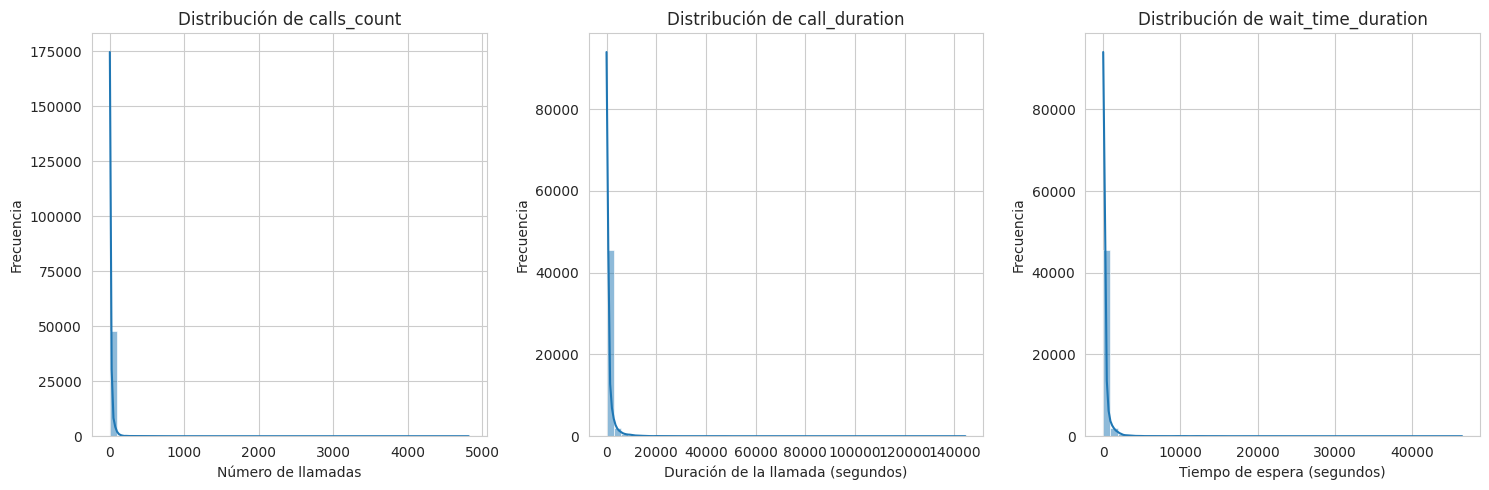




----- Conteo de valores en variables categóricas -----



'direction' distribution:
out    28997
in     19895
Name: direction, dtype: int64


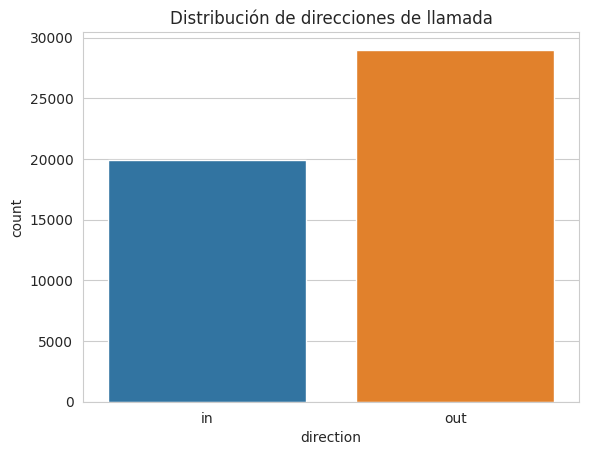


'internal' distribution:
False    43239
True      5653
Name: internal, dtype: int64


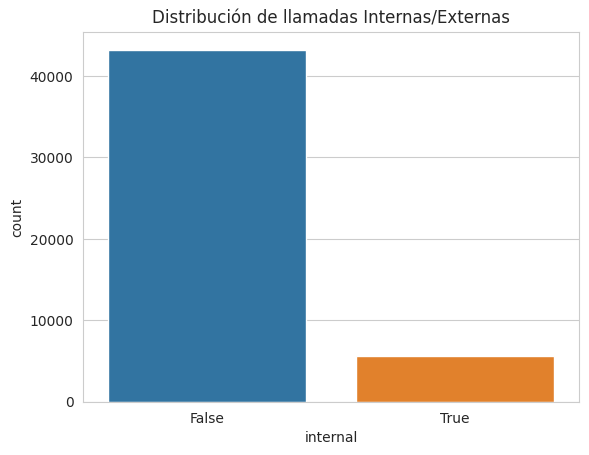


'is_missed_call' distribution:
False    27495
True     21397
Name: is_missed_call, dtype: int64


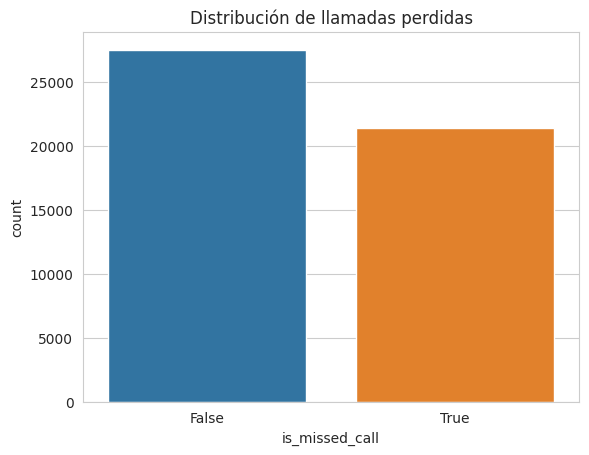


'tariff_plan' distribution:
C    18162
B    17200
A    13530
Name: tariff_plan, dtype: int64


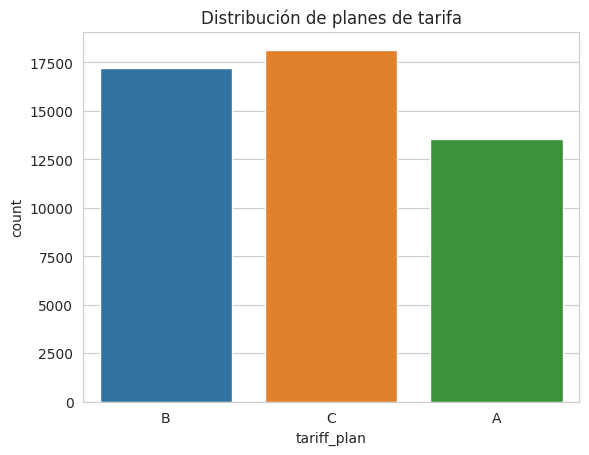

In [50]:
sns.set_style("whitegrid")

print("----- Estadísticas descriptivas de columnas numéricas en df_merged -----")
print(df_merged[['calls_count', 'call_duration', 'total_call_duration', 'wait_time_duration']].describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_merged['calls_count'], bins=50, kde=True)
plt.title('Distribución de calls_count')
plt.xlabel('Número de llamadas')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.histplot(df_merged['call_duration'], bins=50, kde=True)
plt.title('Distribución de call_duration')
plt.xlabel('Duración de la llamada (segundos)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
sns.histplot(df_merged['wait_time_duration'], bins=50, kde=True)
plt.title('Distribución de wait_time_duration')
plt.xlabel('Tiempo de espera (segundos)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print()
print()
print("\n----- Conteo de valores en variables categóricas -----")
print()
print()

print("\n'direction' distribution:")
print(df_merged['direction'].value_counts())
sns.countplot(data=df_merged, x='direction')
plt.title('Distribución de direcciones de llamada')
plt.show()

print("\n'internal' distribution:")
print(df_merged['internal'].value_counts())
sns.countplot(data=df_merged, x='internal')
plt.title('Distribución de llamadas Internas/Externas')
plt.show()

print("\n'is_missed_call' distribution:")
print(df_merged['is_missed_call'].value_counts())
sns.countplot(data=df_merged, x='is_missed_call')
plt.title('Distribución de llamadas perdidas')
plt.show()

print("\n'tariff_plan' distribution:")
print(df_merged['tariff_plan'].value_counts())
sns.countplot(data=df_merged, x='tariff_plan')
plt.title('Distribución de planes de tarifa')
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Una conclusión sobre estas métricas numéricas, establece que las distribuciones están altamente sesgadas a la derecha, con muchos valores concentrados en el extremo inferior y una cola larga de valores muy altos, esto probablemente es común en datos de telecomunicaciones, seria importante considerar esto para las pruebas estadísticas y posibles transformaciones en el desarrollo del proyecto. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Las conclusiones para las distribuciones de variables categóricas es que hay más llamadas salientes out que entrantes in, un dato relevante para la hipótesis sobre la ineficacia de los operadores por pocas llamadas salientes. / La gran mayoría de las llamadas son externas. / Las llamadas internas son una proporción mucho menor, algo bastante importante para el contexto en general. / Una cantidad muy significativa de llamadas son perdidas, un problema importante para CallMeMaybe, reforzando la necesidad de identificar operadores ineficaces, pues la proporción de llamadas perdidas es alta, casi 50/50. / Los planes C y B tienen una distribución bastante equitativa, con el plan A siendo el menos frecuente, nos dejaria analizar si hay diferencias en la ineficacia de los operadores según el plan de tarifa de sus clientes. 
</div>


----- Llamadas perdidas por dirección de llamada -----
is_missed_call     False     True 
direction                         
in              0.606283  0.393717
out             0.532227  0.467773


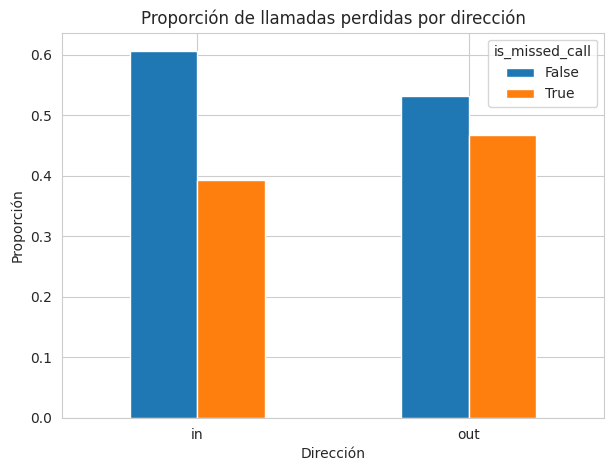

In [51]:
print("\n----- Llamadas perdidas por dirección de llamada -----")
missed_by_direction = df_merged.groupby('direction')['is_missed_call'].value_counts(normalize=True).unstack()
print(missed_by_direction)
missed_by_direction.plot(kind='bar', figsize=(7, 5))
plt.title('Proporción de llamadas perdidas por dirección')
plt.ylabel('Proporción')
plt.xlabel('Dirección')
plt.xticks(rotation=0)
plt.show()


----- Tiempo de espera promedio por dirección y tipo de llamada -----
internal        False      True 
direction                       
in         128.413962  39.561848
out        483.989673  20.853473


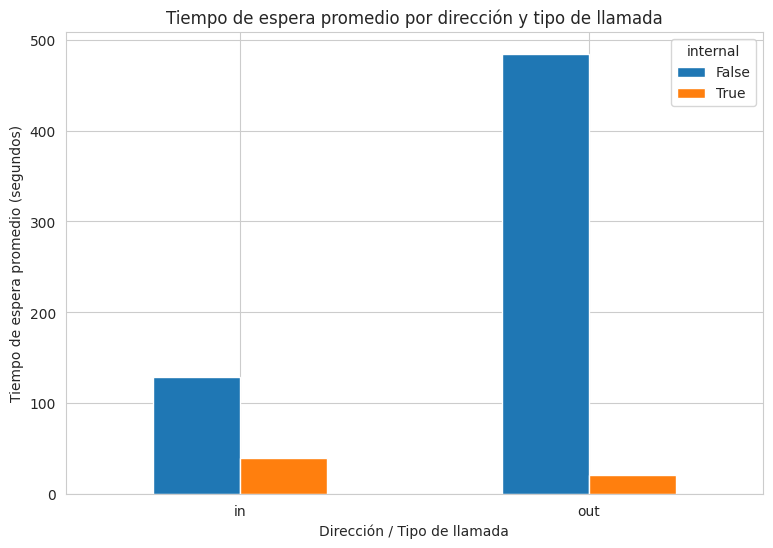

In [52]:
print("\n----- Tiempo de espera promedio por dirección y tipo de llamada -----")
wait_time_by_dir_int = df_merged.groupby(['direction', 'internal'])['wait_time_duration'].mean().unstack()
print(wait_time_by_dir_int)
wait_time_by_dir_int.plot(kind='bar', figsize=(9, 6))
plt.title('Tiempo de espera promedio por dirección y tipo de llamada')
plt.ylabel('Tiempo de espera promedio (segundos)')
plt.xlabel('Dirección / Tipo de llamada')
plt.xticks(rotation=0)
plt.show()

In [53]:
df_in_calls = df_merged[df_merged['direction'] == 'in'].copy()

total_in_calls_by_operator = df_in_calls.groupby('operator_id')['calls_count'].sum().reset_index()
total_in_calls_by_operator.rename(columns={'calls_count': 'total_in_calls'}, inplace=True)

missed_in_calls_by_operator = df_in_calls[df_in_calls['is_missed_call'] == True] \
                                .groupby('operator_id')['calls_count'].sum().reset_index()
missed_in_calls_by_operator.rename(columns={'calls_count': 'missed_in_calls'}, inplace=True)

operator_metrics = pd.merge(total_in_calls_by_operator, missed_in_calls_by_operator, on='operator_id', how='left')
operator_metrics['missed_in_calls'].fillna(0, inplace=True) 

operator_metrics['missed_in_call_rate'] = (operator_metrics['missed_in_calls'] / operator_metrics['total_in_calls'])
operator_metrics.loc[operator_metrics['total_in_calls'] == 0, 'missed_in_call_rate'] = 0 

avg_wait_time_in_by_operator = df_in_calls.groupby('operator_id')['wait_time_duration'].mean().reset_index()
avg_wait_time_in_by_operator.rename(columns={'wait_time_duration': 'avg_wait_time_in'}, inplace=True)
operator_metrics = pd.merge(operator_metrics, avg_wait_time_in_by_operator, on='operator_id', how='left')

df_out_calls = df_merged[df_merged['direction'] == 'out'].copy()
total_out_calls_by_operator = df_out_calls.groupby('operator_id')['calls_count'].sum().reset_index()
total_out_calls_by_operator.rename(columns={'calls_count': 'total_out_calls'}, inplace=True)
operator_metrics = pd.merge(operator_metrics, total_out_calls_by_operator, on='operator_id', how='left')
operator_metrics['total_out_calls'].fillna(0, inplace=True) 

print("\n----- Métricas clave agregadas por operador -----")
print(operator_metrics.head())
print(operator_metrics.describe())

print("\n--- Métricas para operator_id = -1 (Llamadas no asignadas) ---")
print(operator_metrics[operator_metrics['operator_id'] == -1])


----- Métricas clave agregadas por operador -----
   operator_id  total_in_calls  missed_in_calls  missed_in_call_rate  \
0           -1          103884         103238.0             0.993782   
1       879896              58              0.0             0.000000   
2       879898             103              0.0             0.000000   
3       880020               7              0.0             0.000000   
4       880022               8              0.0             0.000000   

   avg_wait_time_in  total_out_calls  
0        174.986421            515.0  
1         27.333333            872.0  
2         29.875000           7209.0  
3          7.714286             38.0  
4         14.000000            189.0  
         operator_id  total_in_calls  missed_in_calls  missed_in_call_rate  \
count     755.000000      755.000000       755.000000           755.000000   
mean   922480.949669      261.756291       137.964238             0.018862   
std     40525.331767     3792.950348      3757.1

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Despues de este procesamiento unas observaciones claves nos indican que las llamadas salientes tienen una proporción de pérdida ligeramente mayor en un 46.78 % a diferencia de las entrantes con un 39.37 %, algo interesante de ver puesto que uno podría esperar lo contrario, pero sugeriria entonces que los los operadores tienen dificultades en completar las llamadas salientes o que los destinatarios no responden, en ambos casos, la proporción de llamadas perdidas es considerablemente alta, confirmandonos que la identificación de operadores ineficaces es una necesidad crítica para CallMeMaybe. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Otra premisa importante es que el tiempo de espera promedio es significativamente más alto para las llamadas externas (False) en comparación con las internas (True), tanto para llamadas entrantes como salientes, dandole sentido, ya que las llamadas internas entre operadores suelen ser rápidas y directas; Por otro lado el tiempo de espera promedio para llamadas salientes y externas es el más alto, casi 484 segundos, más de 8 minutos, una alerta de bandera roja importantisima y un indicador fuerte de la posible ineficacia o problemas en el proceso de llamadas salientes; Asi mismo las llamadas entrantes externas tienen un tiempo de espera de 128.41 segundos, mas de 2 minutos, lo cual también es significativo y concluyente para decir que los tiempos de espera para llamadas externas son preocupantemente altos, especialmente las salientes, un factor clave en la ineficacia.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Otro hallazgo clave es que el operator_id = -1 que para nuestro caso representa llamadas no asignadas o no gestionadas por un operador específico, tiene una tasa de llamadas entrantes perdidas altísima, casi el 100 %, lo que valida la decisión de tratar los NaN en operator_id como una categoría separada, ya que representa un punto de ineficacia del sistema o del proceso de asignación de llamadas, no de un operador individual, indicandonos asi que muchas llamadas se pierden antes de llegar al operador humano. / Otro detalle es que la media es baja 1.88 %, pero su máximo en 1.0 y el 75 % en 0.0069 sugeriria que la mayoría de los operadores tienen una tasa muy baja de llamadas perdidas, pero hay unos pocos que tienen tasas extremadamente altas, precisamente lo que se busca para identificar ineficaces, por esto tal vez algunos operadores tienen tiempos de espera absurdamente largos, lo cual es un signo claro de ineficacia. / Para la variabilidad que es enorme, algunos operadores realizan muchísimas llamadas salientes, mientras que otros con casi el el 25 % tiene 0.0, es decir no realizan ninguna o muy pocas, algo relevante y vital para la hipótesis 3.
</div>

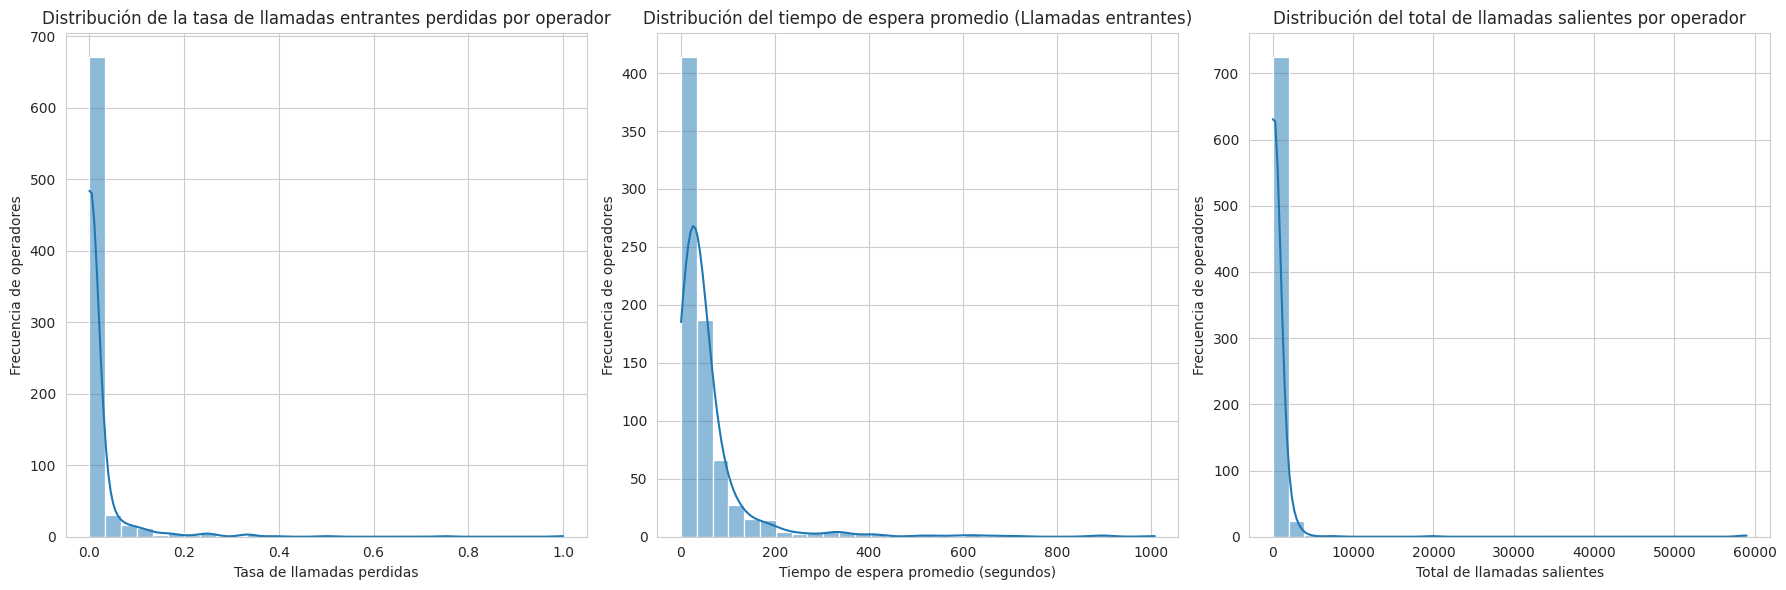




----- Boxplots para ver outliers más claramente -----




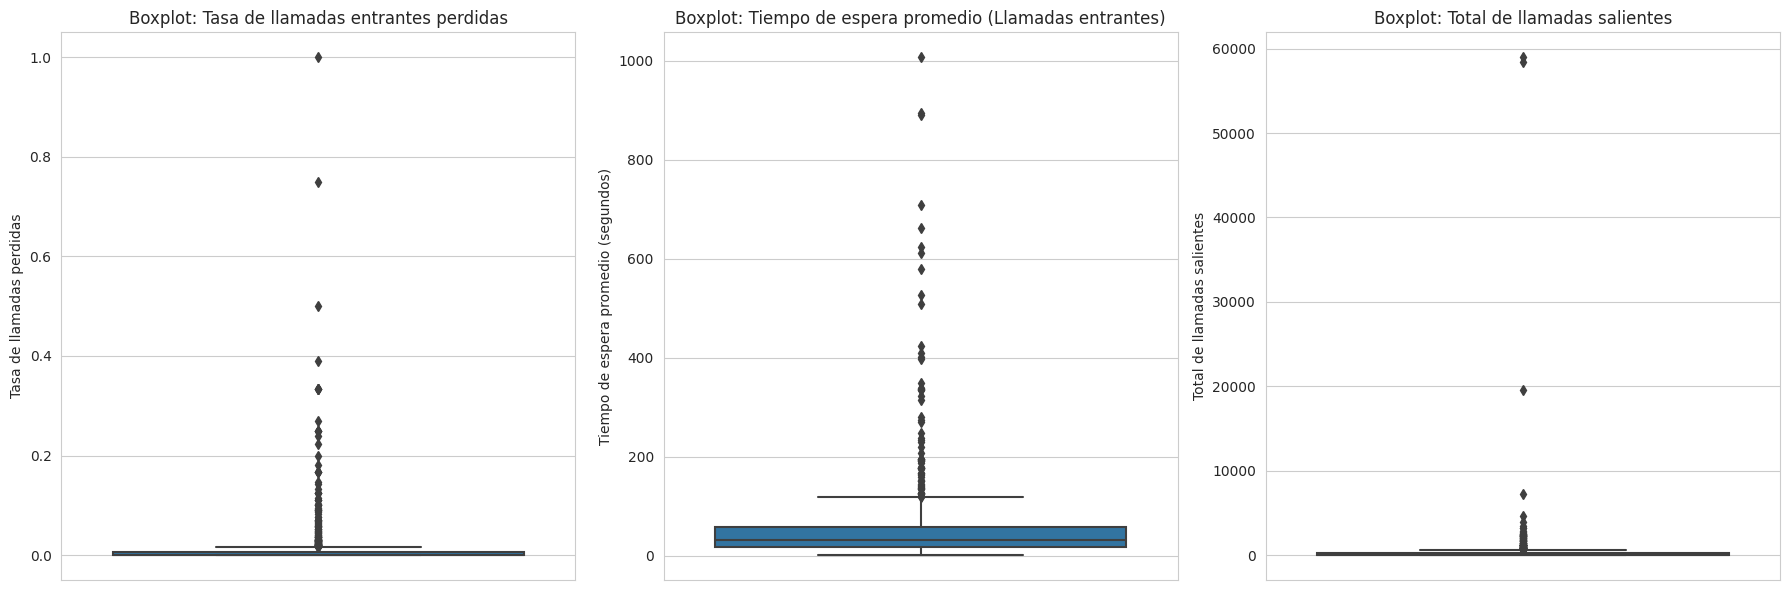

In [54]:
operator_metrics_filtered = operator_metrics[operator_metrics['operator_id'] != -1].copy()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(operator_metrics_filtered['missed_in_call_rate'], bins=30, kde=True)
plt.title('Distribución de la tasa de llamadas entrantes perdidas por operador')
plt.xlabel('Tasa de llamadas perdidas')
plt.ylabel('Frecuencia de operadores')

plt.subplot(1, 3, 2)
sns.histplot(operator_metrics_filtered['avg_wait_time_in'], bins=30, kde=True)
plt.title('Distribución del tiempo de espera promedio (Llamadas entrantes)')
plt.xlabel('Tiempo de espera promedio (segundos)')
plt.ylabel('Frecuencia de operadores')

plt.subplot(1, 3, 3)
sns.histplot(operator_metrics_filtered['total_out_calls'], bins=30, kde=True)
plt.title('Distribución del total de llamadas salientes por operador')
plt.xlabel('Total de llamadas salientes')
plt.ylabel('Frecuencia de operadores')

plt.tight_layout()
plt.show()

print()
print()
print("\n----- Boxplots para ver outliers más claramente -----")
print()
print()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=operator_metrics_filtered['missed_in_call_rate'])
plt.title('Boxplot: Tasa de llamadas entrantes perdidas')
plt.ylabel('Tasa de llamadas perdidas')

plt.subplot(1, 3, 2)
sns.boxplot(y=operator_metrics_filtered['avg_wait_time_in'])
plt.title('Boxplot: Tiempo de espera promedio (Llamadas entrantes)')
plt.ylabel('Tiempo de espera promedio (segundos)')

plt.subplot(1, 3, 3)
sns.boxplot(y=operator_metrics_filtered['total_out_calls'])
plt.title('Boxplot: Total de llamadas salientes')
plt.ylabel('Total de llamadas salientes')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para Tasa de llamadas entrantes perdidas, presenta una distribución que está fuertemente sesgada a la izquierda, en donde la mayoria de operadores tienen una tasa de llamadas perdidas muy cercana a 0, sin embargo, hay una larga cola hacia la derecha, indicando la presencia de unos pocos operadores con tasas de llamadas perdidas significativamente más altas, es decir casi el 100 % de sus llamadas entrantes se pierden. 
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para Tiempo de espera promedio - Llamadas Entrantes, se muestra una distribución que también está fuertemente sesgada a la izquierda, con la mayoría de los operadores teniendo tiempos de espera bajos y una cola considerable hacia la derecha, lo que representa un número reducido de operadores experimenta tiempos de espera promedio muy largos más de 200, 300, e incluso 800-1000 segundos.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para Total de llamadas salientes, vemos una distribución extremadamente sesgada a la izquierda, en donde la gran mayoría de los operadores realizan un número bajo de llamadas salientes, la gran mayoria cerca de 0, pero, hay algunos operadores que realizan miles o decenas de miles de llamadas salientes, una cantidad realmente excesiva.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En el caso de los Boxplots para Outliers en missed_in_call_rate, nos evidencia que la mediana está muy cerca de cero y la mayor parte de los datos se concentran en el rango de la parte de abajo y tambien hay una gran cantidad de puntos individuales por encima del bigote superior, confirmando la presencia de numerosos outliers, es decir operadores con tasas de llamadas perdidas anormalmente altas, podria asegurar que estos son los datos que estamos buscando!.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En avg_wait_time_in muy similar al anterior, la mayoría de los tiempos de espera se agrupan en el rango inferior, el boxplot revela una gran cantidad de outliers con tiempos de espera promedio muy elevados, un indicador clave de ineficacia!.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para total_out_calls, la caja es muy pequeña y está cerca de cero, lo que muestra es que la mayoría de los operadores tienen muy pocas llamadas salientes, sin embargo la presencia de numerosos puntos que se extienden muy por encima del bigote, indica que hay operadores que manejan un volumen extremadamente alto de llamadas salientes, mientras que otros están en el extremo inferior, posiblemente ineficaces si deberían hacer llamadas salientes y no las hacen (Algo que hay que evaluar!).
</div>


----- Matriz de correlación de métricas clave -----
                     calls_count  call_duration  total_call_duration  \
calls_count             1.000000       0.509671             0.633022   
call_duration           0.509671       1.000000             0.975459   
total_call_duration     0.633022       0.975459             1.000000   
wait_time_duration      0.789280       0.500524             0.678857   

                     wait_time_duration  
calls_count                    0.789280  
call_duration                  0.500524  
total_call_duration            0.678857  
wait_time_duration             1.000000  


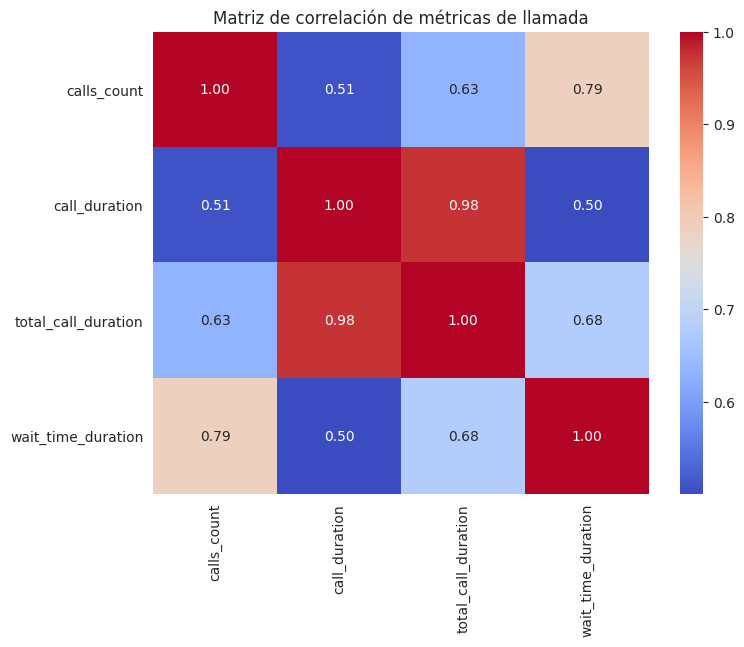


----- Matriz de correlación de métricas de ineficacia por operador (Excluyendo -1) -----
                     missed_in_call_rate  avg_wait_time_in  total_out_calls
missed_in_call_rate             1.000000         -0.042755        -0.007581
avg_wait_time_in               -0.042755          1.000000         0.060349
total_out_calls                -0.007581          0.060349         1.000000


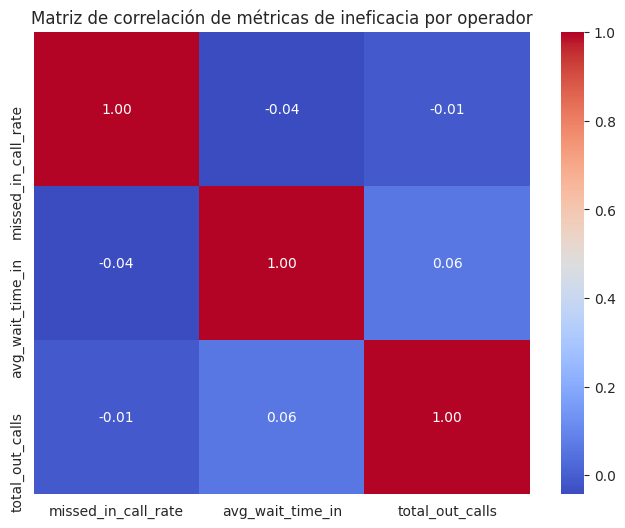

In [55]:
print("\n----- Matriz de correlación de métricas clave -----")

correlation_cols = ['calls_count', 'call_duration', 'total_call_duration', 'wait_time_duration']
correlation_matrix = df_merged[correlation_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de métricas de llamada')
plt.show()

print("\n----- Matriz de correlación de métricas de ineficacia por operador (Excluyendo -1) -----")
operator_corr_cols = ['missed_in_call_rate', 'avg_wait_time_in', 'total_out_calls']
operator_correlation_matrix = operator_metrics_filtered[operator_corr_cols].corr()
print(operator_correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(operator_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de métricas de ineficacia por operador')
plt.show()


Impacto del operator_ID = -1 (No asignado):
  Tasa de llamadas entrantes perdidas: 99.38%
  Tiempo de espera promedio (segundos): 174.99
  Total de llamadas salientes: 515


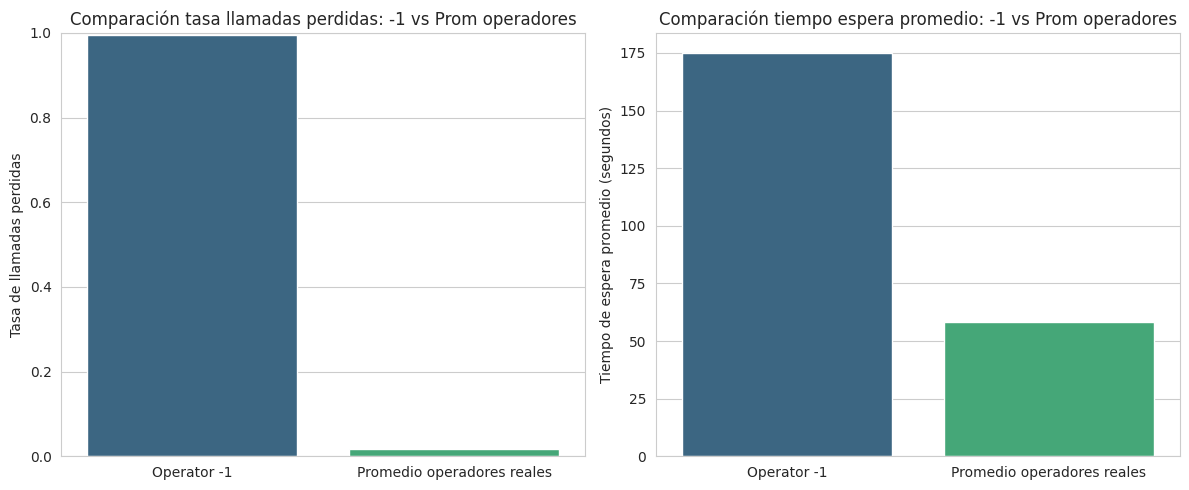

In [56]:
operator_minus_1_data = operator_metrics[operator_metrics['operator_id'] == -1]

if not operator_minus_1_data.empty:
    print(f"\nImpacto del operator_ID = -1 (No asignado):")
    print(f"  Tasa de llamadas entrantes perdidas: {operator_minus_1_data['missed_in_call_rate'].iloc[0]:.2%}")
    print(f"  Tiempo de espera promedio (segundos): {operator_minus_1_data['avg_wait_time_in'].iloc[0]:.2f}")
    print(f"  Total de llamadas salientes: {int(operator_minus_1_data['total_out_calls'].iloc[0])}")

    avg_real_operators_missed_rate = operator_metrics_filtered['missed_in_call_rate'].mean()
    avg_real_operators_wait_time = operator_metrics_filtered['avg_wait_time_in'].mean()

    categories = ['Operator -1', 'Promedio operadores reales']
    missed_rates = [operator_minus_1_data['missed_in_call_rate'].iloc[0], avg_real_operators_missed_rate]
    wait_times = [operator_minus_1_data['avg_wait_time_in'].iloc[0], avg_real_operators_wait_time]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(x=categories, y=missed_rates, palette='viridis')
    plt.title('Comparación tasa llamadas perdidas: -1 vs Prom operadores')
    plt.ylabel('Tasa de llamadas perdidas')
    plt.ylim(0, 1) 

    plt.subplot(1, 2, 2)
    sns.barplot(x=categories, y=wait_times, palette='viridis')
    plt.title('Comparación tiempo espera promedio: -1 vs Prom operadores')
    plt.ylabel('Tiempo de espera promedio (segundos)')

    plt.tight_layout()
    plt.show()

else:
    print("\nEl operator_id = -1 no fue encontrado en las métricas agregadas.")

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Las correlaciones confirman que wait_time_duration es una métrica distintiva y relevante que a su vez esta fuertemente relacionada con la cantidad de llamadas, sugiriendo posibles cuellos de botella en la gestión de alto volumen.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para el análisis de ineficacia, encontramos que las tres métricas de ineficacia son en gran medida independientes entre sí, una conclusion reveladora, pues un operador puede tener una alta tasa de llamadas perdidas pero un tiempo de espera bajo, o viceversa, o un bajo volumen de llamadas salientes sin relación con las otras dos, esto nos quiere decir que para identificar la ineficacia, debemos evaluar a los operadores basándonos en cada una de estas tres métricas por separado, ya que no se predicen mutuamente y si estuvieran altamente correlacionadas, significaría que al resolver un problema por decir algo en llamadas peridas, automáticamente se resolvería el otro, es decir para el tiempo de espera, es asi como siendo estas todas independientes, cada una es un punto critico distinto a abordar.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Una conclusión sobre el operator_id = -1 representa un punto de ineficacia masiva a nivel del sistema o del flujo de llamadas, no de un operador individual humano, es decir las llamadas que no son asignadas a un operador específico se pierden casi por completo y tienen tiempos de espera elevados, nos podria mostar entonces que antes de optimizar el rendimiento de los operadores individuales, CallMeMaybe debería investigar y resolver este problema sistémico que está causando una inmensa cantidad de ineficacia, es una novedad inmensamente significativa como hallazgo crítico del EDA.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Esta ultima muestra refleja datos muy contundentes en Llamadas Perdidas: Se pierde una proporción muy alta de llamadas casi el 40 % entrantes, casi 47 % salientes; Los tiempos de espera, especialmente para llamadas externas salientes, son muy altos; Los Outliers en Operadores individuales con tasas de llamadas perdidas y tiempos de espera promedio anormalmente altos!; El impacto sistémico del operator_id = -1 es uno de los mayores factores de ineficacia en llamadas perdidas y tiempos de espera que provienen de las llamadas no asignadas, todo esto apunta a un problema de ineficacia que es tanto a nivel individual del operador como a nivel sistémico y ya obtuvimos las métricas para cuantificarlo.
</div>

# 2.3. Cuantificar e identificar los Operadores Ineficaces basandose en las métricas definidas en el EDA y en la descripción del problema.

# Cálculo de métricas de ineficacia por operador en tasa de llamadas perdidas entrantes tanto internas como externas para (count(is_missed_call==True AND direction=='in') / count(direction=='in')) por operador.
# Tiempo de espera promedio por llamada entrante para mean(total_call_duration - call_duration) para llamadas direction=='in' por operador.
# Número de llamadas salientes para count(direction=='out') por operador.

# Definir un umbral con criterios de ineficacia teniendo presente el EDA, asi por ejemplo el percentil superior de llamadas perdidas, percentil superior de tiempo de espera, percentil inferior de llamadas salientes, se podra clasificar a un operador como ineficaz, esto a su vez podria requerir un enfoque iterativo.

# Crear una lista de operadores ineficaces en operator_id que cumplan con este criterio.

In [57]:
operator_metrics_humans = operator_metrics[operator_metrics['operator_id'] != -1].copy()

print("\n----- Percentiles de métricas de ineficacia (Operadores humanos) -----")
print(operator_metrics_humans[['missed_in_call_rate', 'avg_wait_time_in', 'total_out_calls']].quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.95]))

threshold_missed_rate = operator_metrics_humans['missed_in_call_rate'].quantile(0.90) 
threshold_wait_time = operator_metrics_humans['avg_wait_time_in'].quantile(0.90) 
threshold_out_calls = operator_metrics_humans['total_out_calls'].quantile(0.10) 

print(f"\nUmbral para tasa de llamadas perdidas (p90): {threshold_missed_rate:.4f}")
print(f"Umbral para tiempo de espera promedio (p90): {threshold_wait_time:.2f} segundos")
print(f"Umbral para total de llamadas salientes (p10): {threshold_out_calls:.2f} llamadas")

print("\n----- Clasificar operadores ineficaces -----")
print("\n----- Criterio 1: Alta tasa de llamadas entrantes perdidas -----")
print()
ineffective_by_missed_rate = operator_metrics_humans[operator_metrics_humans['missed_in_call_rate'] > threshold_missed_rate]
print(f"\nOperadores ineficaces por ALTA tasa de llamadas perdidas ({len(ineffective_by_missed_rate)}):")
print(ineffective_by_missed_rate.sort_values('missed_in_call_rate', ascending=False).head())

print("\n----- Criterio 2: Alto tiempo de espera promedio -----")
print()
ineffective_by_wait_time = operator_metrics_humans[operator_metrics_humans['avg_wait_time_in'] > threshold_wait_time]
print(f"\nOperadores ineficaces por ALTO tiempo de espera promedio ({len(ineffective_by_wait_time)}):")
print(ineffective_by_wait_time.sort_values('avg_wait_time_in', ascending=False).head())

print("\n----- Criterio 3: Bajo volumen de llamadas salientes (si se espera que hagan llamadas salientes) -----")
print()
ineffective_by_low_out_calls = operator_metrics_humans[operator_metrics_humans['total_out_calls'] < threshold_out_calls]
print(f"\nOperadores ineficaces por BAJO volumen de llamadas salientes ({len(ineffective_by_low_out_calls)}):")
print(ineffective_by_low_out_calls.sort_values('total_out_calls', ascending=True).head())

print("\n----- Identificar operadores que cumplen CUALQUIER CRITERIO de ineficacia -----")
print()

ineffective_operators_ids = pd.concat([
    ineffective_by_missed_rate['operator_id'],
    ineffective_by_wait_time['operator_id'],
    ineffective_by_low_out_calls['operator_id']
]).unique()

print(f"\nTotal de operadores identificados como ineficaces por al menos un criterio: {len(ineffective_operators_ids)}")
print(f"IDs de operadores ineficaces: {ineffective_operators_ids}")


----- Percentiles de métricas de ineficacia (Operadores humanos) -----
      missed_in_call_rate  avg_wait_time_in  total_out_calls
0.10             0.000000          9.766667             0.00
0.25             0.000000         17.500000             0.00
0.50             0.000000         31.000000            23.00
0.75             0.006817         58.000000           229.50
0.90             0.037037        115.200000           898.10
0.95             0.091428        188.502833          1547.75

Umbral para tasa de llamadas perdidas (p90): 0.0370
Umbral para tiempo de espera promedio (p90): 115.20 segundos
Umbral para total de llamadas salientes (p10): 0.00 llamadas

----- Clasificar operadores ineficaces -----

----- Criterio 1: Alta tasa de llamadas entrantes perdidas -----


Operadores ineficaces por ALTA tasa de llamadas perdidas (75):
     operator_id  total_in_calls  missed_in_calls  missed_in_call_rate  \
642       948756               1              1.0             1.000000   
1

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Hasta este punto podria decir que se ha logrado identificar un grupo considerable de 144 operadores, que según criterios objetivos basados en el desempeño de toda la fuerza laboral, están teniendo un rendimiento insatisfactorio en al menos UNA de las métricas clave de ineficacia, ya sea por altas llamadas perdidas o altos tiempos de espera. / Asi mismo la ausencia de operadores clasificados por "bajo volumen de llamadas salientes" a un umbral de 0 es un punto clave para observar, se podria mirar tambien si el umbral del 10 % es decir las 0 llamadas es el correcto, o si se esperaba un volumen mínimo mayor, usando el p25 o p50 para total_out_calls si la expectativa es que todos hagan al menos unas cuantas llamadas salientes. / Por otro lado ya se tienen listas de operator_id específicas que se pueden entregar a la Empresa CallMeMaybe para que tomen acciones necesarias e implementen una estrategia que solucione los problemas ya enunciados.
</div>

# 2.4. Verificación de Supuestos para Pruebas Estadísticas.

# Asegurar la validez estadística de los resultados inferenciales al verificar los supuestos requeridos por las pruebas de hipótesis seleccionadas, garantizando la fiabilidad de los datos concluyentes.

# Verificar la normalidad para cada variable que se utilizará en pruebas paramétricas tales como t-test, evaluando si la distribución se aproxima a una distribución normal.

# Las prueba estadística Shapiro-Wilk evaluara la normalidad de las distribuciones de las métricas clave, en este caso los tiempos de espera y/o duración de llamadas.

# Podria comlementarse con graficos Q-Q plots para una inspección visual de la normalidad.

# Evaluar la Homocedasticidad con t-test comparando las medias de dos o más grupos y verificando la homogeneidad de las varianzas entre estos grupos.

# Se utilizara el test de Levene para evaluar la homocedasticidad de las varianzas en las distribuciones de las métricas que se compararán para este caso los tiempos de espera entre grupos de operadores.

# La idea es justificar Tests No Paramétricos, para los casos en los que los supuestos de normalidad o homocedasticidad no se cumplan para alguna de nuestras variables o comparaciones, justificando y aplicando tests no paramétricos alternativos para este caso Mann-Whitney U test para que se pueda comparar dos grupos independientes sin asumir normalidad explicando por qué son más adecuados en ese contexto.

# Comprobación de condiciones para Pruebas de Proporciones en el caso de que alguna hipótesis se comparara en proporciones de llamadas perdidas, verificando tambien el tamaño de la muestra y otras condiciones para el uso de la prueba Z.


----- Pruebas de normalidad (Shapiro-Wilk) -----
Hipótesis Nula (H0): La distribución de los datos es normal.
Hipótesis Alternativa (H1): La distribución de los datos NO es normal.
Si p-valor < 0.05, rechazamos H0 (la distribución NO es normal).

Métrica: missed_in_call_rate
  Estadístico de Shapiro-Wilk: 0.2790
  P-valor: 0.0000
  Conclusión: Rechazamos H0. Los datos de 'missed_in_call_rate' NO siguen una distribución normal.
--------------------------------------------------
Métrica: avg_wait_time_in
  Estadístico de Shapiro-Wilk: 0.4638
  P-valor: 0.0000
  Conclusión: Rechazamos H0. Los datos de 'avg_wait_time_in' NO siguen una distribución normal.
--------------------------------------------------

----- Q-Q Plots para inspección visual de normalidad -----




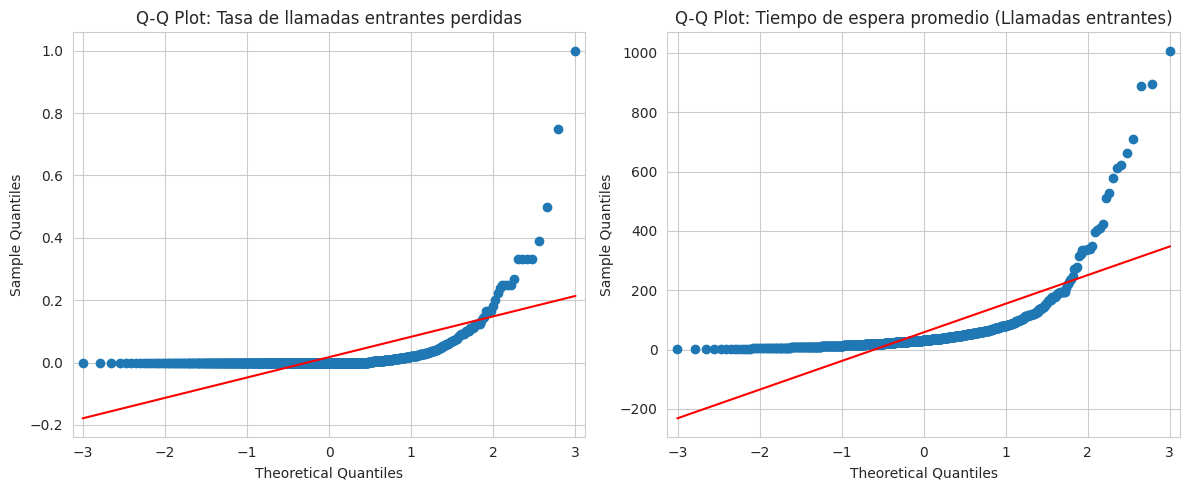

In [58]:
metrics_for_normality = operator_metrics_humans[['missed_in_call_rate', 'avg_wait_time_in']]

print("\n----- Pruebas de normalidad (Shapiro-Wilk) -----")
print("Hipótesis Nula (H0): La distribución de los datos es normal.")
print("Hipótesis Alternativa (H1): La distribución de los datos NO es normal.")
print("Si p-valor < 0.05, rechazamos H0 (la distribución NO es normal).\n")

for column in metrics_for_normality.columns:
    stat, p = shapiro(metrics_for_normality[column])
    print(f"Métrica: {column}")
    print(f"  Estadístico de Shapiro-Wilk: {stat:.4f}")
    print(f"  P-valor: {p:.4f}")
    if p < 0.05:
        print(f"  Conclusión: Rechazamos H0. Los datos de '{column}' NO siguen una distribución normal.")
    else:
        print(f"  Conclusión: No rechazamos H0. Los datos de '{column}' PUEDEN seguir una distribución normal.")
    print("-" * 50)

print("\n----- Q-Q Plots para inspección visual de normalidad -----")
print()
print()
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sm.qqplot(metrics_for_normality['missed_in_call_rate'], line='s', ax=plt.gca())
plt.title('Q-Q Plot: Tasa de llamadas entrantes perdidas')

plt.subplot(1, 2, 2)
sm.qqplot(metrics_for_normality['avg_wait_time_in'], line='s', ax=plt.gca())
plt.title('Q-Q Plot: Tiempo de espera promedio (Llamadas entrantes)')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Los hallazgos nos confirman la No Normalidad, tanto las pruebas de Shapiro-Wilk con p-valor = 0.0000,  como los Q-Q plots muestran de manera irrefutable que las distribuciones de missed_in_call_rate y avg_wait_time_in no son normales y es exactamente lo que se queria confirmar dado el sesgo que vimos en los histogramas del EDA. / Porque es importante? porque esta confirmación significa que NO podemos utilizar pruebas estadísticas paramétricas como el t-test la cual asume normalidad para comparar las medias de estos grupos, al hacerlo los resultados de esas pruebas serían inválidos o poco fiables; Es asi como se justifica plenamente la utilizacion de tests no paramétricos como el Mann-Whitney U test para comparar grupos independientes, que no requerira la asunción de normalidad, por lo tanto NO se requiere ejecutar Levene ahora, ya que la no-normalidad es suficiente justificación, si fuera necesario probablemente más adelante para las hipótesis específicas, se podría implementar!.
</div>

# 2.5. Prueba de Hipótesis Estadísticas - Validar estadísticamente las hipótesis propuestas.

# H1 (Llamadas Perdidas): Comparar la tasa de llamadas perdidas de operadores ineficaces versus los eficaces o podria compararse grupos con alta y baja tasa de llamadas perdidas y ver otras características similares, desarrollando posiblemente una prueba t-test.

# H2 (Tiempo de Espera): Comparar el tiempo de espera de operadores ineficaces contra eficaces con una prueba t-test.

# H3 (Llamadas Salientes): Comparar el número de llamadas salientes de operadores ineficaces frente eficaces con una prueba t-test.

# Formulación de hipótesis nula y alternativa para cada prueba, establecer el nivel de significancia alfa e interpretar los p-valores.

In [59]:
group_ineffective_missed = operator_metrics_humans[operator_metrics_humans['missed_in_call_rate'] > threshold_missed_rate]['missed_in_call_rate']
group_effective_missed = operator_metrics_humans[operator_metrics_humans['missed_in_call_rate'] <= threshold_missed_rate]['missed_in_call_rate']

print("----- Prueba de Mann-Whitney U para tasa de llamadas entrantes perdidas -----")
print("H0: No hay diferencia significativa en la mediana de la tasa de llamadas perdidas entre operadores ineficaces y eficaces.")
print("H1: Los operadores ineficaces tienen una mediana de tasa de llamadas perdidas significativamente MÁS ALTA que los operadores eficaces.")

stat, p_value = mannwhitneyu(group_ineffective_missed, group_effective_missed, alternative='greater')

print(f"\nEstadístico U de Mann-Whitney: {stat:.4f}")
print(f"P-valor: {p_value:.4f}")

alpha = 0.05 

if p_value < alpha:
    print(f"Conclusión: Con un p-valor de {p_value:.4f} ( < {alpha}), rechazamos la Hipótesis Nula.")
    print("Existe evidencia estadística de que los operadores clasificados como ineficaces por su alta tasa de llamadas perdidas tienen una mediana de tasa de llamadas perdidas significativamente MÁS ALTA que los operadores eficaces.")
else:
    print(f"Conclusión: Con un p-valor de {p_value:.4f} ( >= {alpha}), no rechazamos la Hipótesis Nula.")
    print("No hay evidencia estadística suficiente para afirmar que los operadores ineficaces tienen una mediana de tasa de llamadas perdidas significativamente más alta.")

----- Prueba de Mann-Whitney U para tasa de llamadas entrantes perdidas -----
H0: No hay diferencia significativa en la mediana de la tasa de llamadas perdidas entre operadores ineficaces y eficaces.
H1: Los operadores ineficaces tienen una mediana de tasa de llamadas perdidas significativamente MÁS ALTA que los operadores eficaces.

Estadístico U de Mann-Whitney: 50925.0000
P-valor: 0.0000
Conclusión: Con un p-valor de 0.0000 ( < 0.05), rechazamos la Hipótesis Nula.
Existe evidencia estadística de que los operadores clasificados como ineficaces por su alta tasa de llamadas perdidas tienen una mediana de tasa de llamadas perdidas significativamente MÁS ALTA que los operadores eficaces.


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Como conclusión, existe evidencia estadística sólida para afirmar que los operadores que clasificamos como ineficaces, basados en tener una alta tasa de llamadas entrantes perdidas tienen, de hecho, una mediana de tasa de llamadas perdidas significativamente MÁS ALTA que los operadores eficaces.
</div>

In [60]:
group_ineffective_wait = operator_metrics_humans[operator_metrics_humans['avg_wait_time_in'] > threshold_wait_time]['avg_wait_time_in']
group_effective_wait = operator_metrics_humans[operator_metrics_humans['avg_wait_time_in'] <= threshold_wait_time]['avg_wait_time_in']

print("----- Prueba de Mann-Whitney U para tiempo de espera promedio -----")
print("H0: No hay diferencia significativa en la mediana del tiempo de espera promedio entre operadores ineficaces y eficaces.")
print("H1: Los operadores ineficaces tienen una mediana de tiempo de espera promedio significativamente MÁS ALTA que los operadores eficaces.")

stat, p_value = mannwhitneyu(group_ineffective_wait, group_effective_wait, alternative='greater')

print(f"\nEstadístico U de Mann-Whitney: {stat:.4f}")
print(f"P-valor: {p_value:.4f}")

alpha = 0.05 

if p_value < alpha:
    print(f"Conclusión: Con un p-valor de {p_value:.4f} ( < {alpha}), rechazamos la Hipótesis Nula.")
    print("Existe evidencia estadística de que los operadores clasificados como ineficaces por su alto tiempo de espera promedio tienen una mediana de tiempo de espera significativamente MÁS ALTA que los operadores eficaces.")
else:
    print(f"Conclusión: Con un p-valor de {p_value:.4f} ( >= {alpha}), no rechazamos la Hipótesis Nula.")
    print("No hay evidencia estadística suficiente para afirmar que los operadores ineficaces tienen una mediana de tiempo de espera significativamente más alta.")

----- Prueba de Mann-Whitney U para tiempo de espera promedio -----
H0: No hay diferencia significativa en la mediana del tiempo de espera promedio entre operadores ineficaces y eficaces.
H1: Los operadores ineficaces tienen una mediana de tiempo de espera promedio significativamente MÁS ALTA que los operadores eficaces.

Estadístico U de Mann-Whitney: 51528.0000
P-valor: 0.0000
Conclusión: Con un p-valor de 0.0000 ( < 0.05), rechazamos la Hipótesis Nula.
Existe evidencia estadística de que los operadores clasificados como ineficaces por su alto tiempo de espera promedio tienen una mediana de tiempo de espera significativamente MÁS ALTA que los operadores eficaces.


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para este paso, se evidencia que existe evidencia estadística sólida para afirmar que los operadores que clasificamos como ineficaces, teniendo encuenta un alto tiempo de espera promedio demuestran, tajantemente, una mediana de tiempo de espera significativamente MÁS ALTA que los operadores eficaces.
</div>

In [61]:
group_ineffective_zero_out_calls = operator_metrics_humans[operator_metrics_humans['total_out_calls'] == 0]['total_out_calls']
group_effective_some_out_calls = operator_metrics_humans[operator_metrics_humans['total_out_calls'] > 0]['total_out_calls']

print("----- Prueba de Mann-Whitney U para volumen de llamadas salientes -----")
print("H0: No hay diferencia significativa en la mediana del volumen de llamadas salientes entre operadores con cero llamadas salientes y aquellos con al menos una.")
print("H1: Los operadores con cero llamadas salientes tienen una mediana de volumen de llamadas salientes significativamente MÁS BAJA que los operadores con al menos una llamada saliente.")

if len(group_ineffective_zero_out_calls) == 0 or len(group_effective_some_out_calls) == 0:
    print("\nAdvertencia: Uno de los grupos para la prueba de llamadas salientes está vacío o es muy pequeño.")
    print(f"Tamaño grupo (cero llamadas): {len(group_ineffective_zero_out_calls)}")
    print(f"Tamaño grupo (al menos una llamada): {len(group_effective_some_out_calls)}")
    print("No se puede realizar la prueba de Mann-Whitney U en estas condiciones.")
else:
    stat, p_value = mannwhitneyu(group_ineffective_zero_out_calls, group_effective_some_out_calls, alternative='less')

    print(f"\nEstadístico U de Mann-Whitney: {stat:.4f}")
    print(f"P-valor: {p_value:.4f}")

    alpha = 0.05 

    if p_value < alpha:
        print(f"Conclusión: Con un p-valor de {p_value:.4f} ( < {alpha}), rechazamos la Hipótesis Nula.")
        print("Existe evidencia estadística de que los operadores con cero llamadas salientes tienen una mediana de volumen de llamadas salientes significativamente MÁS BAJA que los operadores que realizan al menos una llamada saliente.")
    else:
        print(f"Conclusión: Con un p-valor de {p_value:.4f} ( >= {alpha}), no rechazamos la Hipótesis Nula.")
        print("No hay evidencia estadística suficiente para afirmar que los operadores con cero llamadas salientes tienen una mediana de volumen de llamadas salientes significativamente más baja.")

----- Prueba de Mann-Whitney U para volumen de llamadas salientes -----
H0: No hay diferencia significativa en la mediana del volumen de llamadas salientes entre operadores con cero llamadas salientes y aquellos con al menos una.
H1: Los operadores con cero llamadas salientes tienen una mediana de volumen de llamadas salientes significativamente MÁS BAJA que los operadores con al menos una llamada saliente.

Estadístico U de Mann-Whitney: 0.0000
P-valor: 0.0000
Conclusión: Con un p-valor de 0.0000 ( < 0.05), rechazamos la Hipótesis Nula.
Existe evidencia estadística de que los operadores con cero llamadas salientes tienen una mediana de volumen de llamadas salientes significativamente MÁS BAJA que los operadores que realizan al menos una llamada saliente.


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Para terminar en esta ultima, se muestra que existe evidencia estadística muy fuerte para afirmar que los operadores con cero llamadas salientes tienen una mediana de volumen de llamadas salientes significativamente MÁS BAJA que los operadores que realizan al menos una llamada saliente.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
En resumen, las tres pruebas de hipótesis han sido exitosas y han validado estadísticamente los criterios para identificar operadores ineficaces, pues se confirma que los operadores con altas tasas de llamadas perdidas son significativamente diferentes, asi tambien se confirma que los operadores con altos tiempos de espera promedio son significativamente diferentes y tambien se confirma que los operadores con cero llamadas salientes son significativamente diferentes del resto.
</div>

# 2.6. Trabajar con Métricas de Negocio e Indicadores - Cuantificar el impacto de la ineficacia proponiendo posibles indicadores de seguimiento.

# Impacto de los operadores ineficaces calculando el volumen de llamadas perdidas totales o tiempo de espera excesivo atribuible a estos operadores.

# Realizar KPIs definiendo métricas clave para que los supervisores puedan monitorear continuamente la eficacia de los operadores ya sea en tasa de llamadas perdidas por operador/día, Tiempo promedio de espera por operador/día o llamadas salientes por operador/día).

# Análisis del impacto de los planes de tarifa, verificando si existe alguna correlación entre el plan de tarifa del cliente y el rendimiento de sus operadores.

In [62]:
list_ineffective_by_missed_rate = ineffective_by_missed_rate['operator_id'].tolist()
list_ineffective_by_wait_time = ineffective_by_wait_time['operator_id'].tolist()
list_ineffective_by_zero_out_calls = operator_metrics_humans[operator_metrics_humans['total_out_calls'] == 0]['operator_id'].tolist()

ineffective_operators_ids = pd.concat([
    ineffective_by_missed_rate['operator_id'],
    ineffective_by_wait_time['operator_id'],
    operator_metrics_humans[operator_metrics_humans['total_out_calls'] == 0]['operator_id'] 
]).unique()
list_ineffective_operators_overall = ineffective_operators_ids.tolist()


print("\n----- Listas consolidadas de operadores ineficaces para recomendaciones -----")
print()
print()
print(f"Operadores con ALTA tasa de llamadas perdidas ({len(list_ineffective_by_missed_rate)}): {list_ineffective_by_missed_rate}")
print()
print()
print(f"Operadores con ALTO tiempo de espera promedio ({len(list_ineffective_by_wait_time)}): {list_ineffective_by_wait_time}")
print()
print()
print(f"Operadores con CERO volumen de llamadas salientes ({len(list_ineffective_by_zero_out_calls)}): {list_ineffective_by_zero_out_calls}")
print()
print()
print(f"TOTAL Operadores Ineficaces (por al menos UN criterio) ({len(list_ineffective_operators_overall)}): {list_ineffective_operators_overall}")


----- Listas consolidadas de operadores ineficaces para recomendaciones -----


Operadores con ALTA tasa de llamadas perdidas (75): [884408, 888406, 888532, 888868, 890228, 894120, 894224, 894230, 894232, 894614, 895776, 896538, 897872, 898414, 899268, 900492, 900746, 904016, 904344, 905300, 905862, 906392, 906412, 907952, 910226, 911102, 911142, 912684, 913886, 918888, 919218, 919896, 920706, 921814, 924930, 924936, 924948, 924954, 926490, 926872, 927910, 927912, 928382, 930020, 930242, 932460, 933986, 934076, 934098, 937368, 937432, 937874, 937898, 939478, 939708, 941844, 944216, 944218, 944220, 944222, 944226, 945046, 947304, 948286, 948288, 948756, 948758, 951508, 957922, 958416, 958434, 958640, 959312, 964510, 964666]


Operadores con ALTO tiempo de espera promedio (76): [882684, 882686, 882688, 882690, 885890, 887276, 891410, 892534, 893804, 899082, 902510, 902532, 905842, 906070, 906076, 906404, 906406, 906408, 906410, 906680, 908834, 908958, 908960, 913788, 913938, 913942, 916

In [63]:
df_ineffective_calls = df_merged[df_merged['operator_id'].isin(list_ineffective_operators_overall)].copy()

print("\n----- Impacto cuantificable de los operadores ineficaces identificados -----")

total_missed_calls_by_ineffective = df_ineffective_calls[
    (df_ineffective_calls['direction'] == 'in') &
    (df_ineffective_calls['is_missed_call'] == True)
].shape[0]

total_missed_calls_overall = df_merged[(df_merged['direction'] == 'in') & (df_merged['is_missed_call'] == True)].shape[0]

print(f"\nTotal de llamadas entrantes perdidas atribuibles a operadores ineficaces: {total_missed_calls_by_ineffective}")
if total_missed_calls_overall > 0:
    print(f"  ({(total_missed_calls_by_ineffective / total_missed_calls_overall):.2%} del total de llamadas perdidas generales)")

total_wait_time_ineffective_in = df_ineffective_calls[df_ineffective_calls['direction'] == 'in']['wait_time_duration'].sum()

total_wait_time_overall_in = df_merged[df_merged['direction'] == 'in']['wait_time_duration'].sum()


print(f"\nTotal de tiempo de espera (segundos) en llamadas entrantes atribuible a operadores ineficaces: {total_wait_time_ineffective_in:.2f} segundos")
print(f"  Esto equivale a aproximadamente {total_wait_time_ineffective_in / 3600:.2f} horas de espera.")
if total_wait_time_overall_in > 0:
    print(f"  ({(total_wait_time_ineffective_in / total_wait_time_overall_in):.2%} del total de tiempo de espera en llamadas entrantes)")

total_out_calls_by_zero_ineffective = df_ineffective_calls[
    (df_ineffective_calls['operator_id'].isin(list_ineffective_by_zero_out_calls)) &
    (df_ineffective_calls['direction'] == 'out')
].shape[0]

print(f"\nTotal de llamadas salientes realizadas por operadores ineficaces con CERO llamadas salientes: {total_out_calls_by_zero_ineffective}")
print("(Teniendo en cuenta que es el criterio que se definio para los operadores que no realizan llamadas salientes.)")


----- Impacto cuantificable de los operadores ineficaces identificados -----

Total de llamadas entrantes perdidas atribuibles a operadores ineficaces: 472
  (6.03% del total de llamadas perdidas generales)

Total de tiempo de espera (segundos) en llamadas entrantes atribuible a operadores ineficaces: 893457.00 segundos
  Esto equivale a aproximadamente 248.18 horas de espera.
  (35.81% del total de tiempo de espera en llamadas entrantes)

Total de llamadas salientes realizadas por operadores ineficaces con CERO llamadas salientes: 0
(Teniendo en cuenta que es el criterio que se definio para los operadores que no realizan llamadas salientes.)


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Estas listas son el resultado final de como se identifico la ineficacia a travez de una base solida fundamentada en recomendaciones clave para CallMeMaybe, considerando si las llamadas salientes son parte esperada del rol, pues nos muestra una gran cantidad de operadores con cero llamadas salientes, un dato revelador!
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
472 llamadas perdidas es un volumen considerable, lo relevante aqui es estas llamadas son directamente atribuibles a la ineficacia individual de los operadores humanos y no al problema sistémico del -1, esto a su vez significa que mejorar el desempeño de estos 333 operadores tiene el potencial de recuperar esas 472 llamadas.
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Casi el 36 % de todo el tiempo de espera en llamadas entrantes se debe al grupo de operadores ineficaces, es un golpe directo y significativo en la experiencia del cliente, la eficiencia operativa y el tiempo perdido, reducirlo es una oportunidad de mejora enorme para CallMeMaybe!
</div>

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Definir ineficacia como hacer cero llamadas salientes, entonces estamos diciendo que estos operadores, por definición, no contribuyen con llamadas salientes, la relevancia de este impacto dependerá de si CallMeMaybe espera que estos operadores realicen llamadas salientes y si sí lo espera, entonces la ineficacia aquí brilla por su ausencia, cuantificada en 0, y es que estos operadores son responsables de casi 250 horas de tiempo de espera excesivo para los clientes!!!, es decir un tercio del tiempo de espera total, algo inaceptable diria yo para mostrar resultados efectivos en la empresa, son argumentos muy sólidos y convincentes para la gerencia, encaminarlos a invertir en mejorar el rendimiento de estos operadores.
</div>

Para que CallMeMaybe pueda monitorear continuamente la eficacia de sus operadores y el impacto de las acciones tomadas, se proponen los siguientes Key Performance Indicators y métricas de seguimiento, desagregados por operador y si es relevante por día o período:

* **Tasa de llamadas entrantes perdidas por operador (`missed_in_call_rate_daily`):**
    * **Definición:** `(Número de llamadas entrantes perdidas por operador en un Día / Total de llamadas entrantes asignadas al operador en un día) * 100`
    * **Objetivo:** Reducir el porcentaje, enfocado principalmente a 0 %, monitoreando con detalle a los operadores que excedan el umbral de ineficacia ya identificado en p90.
    * **Frecuencia:** Diaria o semanal.

* **Tiempo promedio de espera por operador (`avg_wait_time_in_daily`):**
    * **Definición:** `(Suma de la duración del tiempo de espera de llamadas entrantes asignadas al operador en un día / Número de llamadas entrantes atendidas por el operador en un día)`
    * **Objetivo:** Reducir este valor en segundos y monitorear a los operadores que continuamente superen el umbral de ineficacia ya identificado en p90.
    * **Frecuencia:** Diaria o semanal.

* **Volumen de llamadas salientes por operador (`total_out_calls_daily`):**
    * **Definición:** `Número total de llamadas salientes realizadas por un operador en un día.`
    * **Objetivo:** Asegurar que los operadores cumplan con los objetivos de llamadas salientes según su rol y monitorear a los operadores que registren cero o un bajo volumen consistente si las llamadas salientes son una expectativa.
    * **Frecuencia:** Diaria o semanal.

* **KPI Adicional: Volumen de llamadas NO asignadas / Perdidas en el sistema (`system_missed_calls_rate`):**
    * **Definición:** `(Número de llamadas con operator_id = -1 / Total de llamadas entrantes globales) * 100`
    * **Objetivo:** Reducir este porcentaje a la mínima expresión, el ideal 0 %, ya que esto indica un fallo a nivel de sistema que afecta a todas las llamadas.
    * **Frecuencia:** Diaria o semanal al nivel de sistema.

Estos KPIs permitirán a los supervisores tener una visión clara del rendimiento individual de los operadores y del sistema, facilitando la toma de decisiones basada en datos para mejorar la eficacia general.


----- Análisis de métricas de operador por plan de tarifa del cliente -----
             missed_in_call_rate_overall  avg_wait_time_in_overall  \
tariff_plan                                                          
A                               0.353721                 88.250145   
B                               0.343610                120.816282   
C                               0.325299                 83.874308   

             total_out_calls_from_plan_customers  
tariff_plan                                       
A                                           8759  
B                                          10303  
C                                           9751  


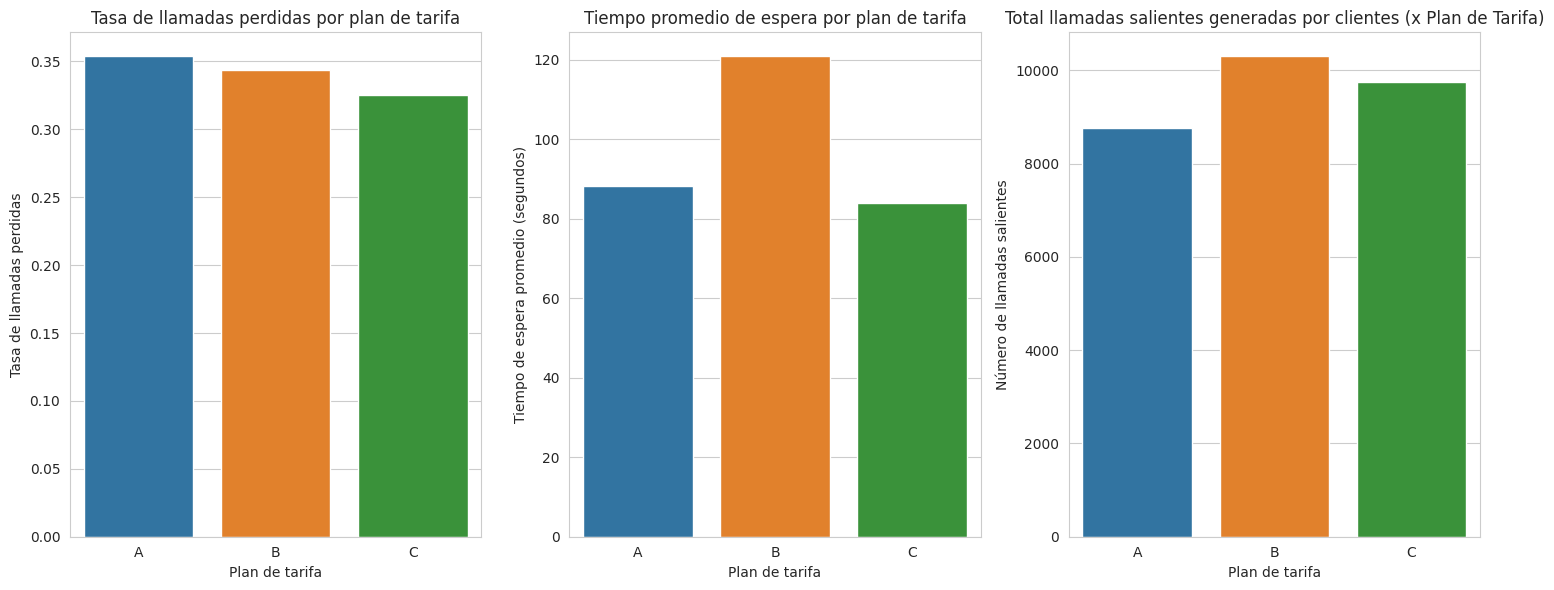


----- Observaciones sobre la correlación entre Plan de tarifa y rendimiento del operador -----


In [64]:
print("\n----- Análisis de métricas de operador por plan de tarifa del cliente -----")

df_human_calls = df_merged[df_merged['operator_id'] != -1].copy()

missed_rate_by_plan = df_human_calls.groupby('tariff_plan').apply(
    lambda x: (x[x['is_missed_call'] == True].shape[0] / x.shape[0]) if x.shape[0] > 0 else 0
).rename('missed_in_call_rate_overall')

avg_wait_time_by_plan = df_human_calls[df_human_calls['direction'] == 'in'].groupby('tariff_plan')['wait_time_duration'].mean().rename('avg_wait_time_in_overall')

total_out_calls_by_plan = df_human_calls[df_human_calls['direction'] == 'out'].groupby('tariff_plan').size().rename('total_out_calls_from_plan_customers')

plan_metrics_summary = pd.DataFrame({
    'missed_in_call_rate_overall': missed_rate_by_plan,
    'avg_wait_time_in_overall': avg_wait_time_by_plan,
    'total_out_calls_from_plan_customers': total_out_calls_by_plan
}).fillna(0) 

print(plan_metrics_summary)

plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=plan_metrics_summary.index, y='missed_in_call_rate_overall', data=plan_metrics_summary)
plt.title('Tasa de llamadas perdidas por plan de tarifa')
plt.ylabel('Tasa de llamadas perdidas')
plt.xlabel('Plan de tarifa')

plt.subplot(1, 3, 2)
sns.barplot(x=plan_metrics_summary.index, y='avg_wait_time_in_overall', data=plan_metrics_summary)
plt.title('Tiempo promedio de espera por plan de tarifa')
plt.ylabel('Tiempo de espera promedio (segundos)')
plt.xlabel('Plan de tarifa')

plt.subplot(1, 3, 3)
sns.barplot(x=plan_metrics_summary.index, y='total_out_calls_from_plan_customers', data=plan_metrics_summary)
plt.title('Total llamadas salientes generadas por clientes (x Plan de Tarifa)')
plt.ylabel('Número de llamadas salientes')
plt.xlabel('Plan de tarifa')

plt.tight_layout()
plt.show()

print("\n----- Observaciones sobre la correlación entre Plan de tarifa y rendimiento del operador -----")

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Existe una correlación evidente entre el plan de tarifa del cliente y el rendimiento de los operadores, especialmente en el tiempo promedio de espera; Los clientes del Plan B son los que tienen el mayor tiempo promedio de espera, una métrica crítica de la experiencia del cliente que debe ser investigada, esto a su vez podría requerir un análisis de la complejidad de las llamadas del Plan B, una capacitación específica para operadores que atienden a estos clientes, asegurar que los operadores más eficientes estén disponibles para este segmento, optimizar los procesos para el Plan B; Todas las diferencias en la tasa de llamadas perdidas y el volumen de llamadas salientes son menos pronunciadas, pero aún así dan pistas sobre el comportamiento de los clientes y la interacción con los operadores.
</div>

# 2.7. Presentación - Comunicar hallazgos clave, metodología y las recomendaciones a la gerencia y supervisores.

# Diseño de diapositivas utilizando visualizaciones efectivas con poco texto, PDF que se colocara como enlace en la presentación del cuerpo de este proyecto final.

# 3. Temas Adicionales

# Prueba A/B - Bases de Datos SQL - Dashboards interactivo en Tableau Public para visualizar métricas clave de ineficacia y tendencias.
# Contenido alterno que incluye histogramas de duración de llamadas, distribución de llamadas tanto internas como externas, número de llamadas por día, generacion de un resumen de las métricas de ineficacia de los operadores, incorporando filtros por dirección de llamada, tipo de llamada externa e interna, cada uno por operador o cliente.
# Utilizacion de documentación externa durante el desarrollo del proyecto final, la idea es recopilar y listar fuentes como artículos, documentación de librerías y una breve explicación de cómo esta informacion resulto util.

#### 3.1. Prueba A/B: Diseño de un experimento para evaluar intervenciones.

Para evaluar la efectividad de una nueva capacitación o intervención dirigida a mejorar el rendimiento de los operadores, se propone el siguiente diseño de Prueba A/B:

**1. Objetivo del experimento:**
   * Evaluar si una nueva capacitación o cualquier otra intervención específica que reduzca significativamente el tiempo promedio de espera de los operadores ineficaces sin comprometer la calidad del servicio.

**2. Identificación y asignación de grupos:**
   * **Población objetivo:** Operadores identificados como "ineficaces" basándose en su "Tiempo promedio de espera" aquellos cuyos valores por encima del percentil 90 o el umbral definido.
   * **Aleatorización:** De esta población objetivo, se seleccionarían aleatoriamente dos grupos:
     * **Grupo de tratamiento-Grupo A:** Operadores que recibirán la nueva capacitación o intervención.
     * **Grupo de control-Grupo B:** Operadores que no recibirán la nueva capacitación continuando con el enfoque actual o una capacitación estándar, si existe.

**3. Métricas clave a medir:**
   * **Métrica primaria de exito:**
     * **"Tiempo promedio de espera por operador" (avg_wait_time_in):** Se monitorearía el promedio diario/semanal de esta métrica para cada operador en ambos grupos después de la intervención.
   * **Métricas secundarias para salvaguardar el monitoreo:**
     * **"Tasa de llamadas perdidas por operador" (missed_in_call_rate):** Para asegurar que la reducción del tiempo de espera no se logre a expensas de un aumento en llamadas perdidas.
     * **"Duración promedio de llamada" (call_duration):** Para evitar que los operadores acorten las llamadas de forma contraproducente en el ejercicio.
     * **"Puntuaciones de satisfacción del cliente":** Si se llegasen a tener para evaluar el impacto en la experiencia del cliente.

**4. Duración del experimento:**
   * Se recomienda un período de al menos **4 a 6 semanas** después de la capacitación o intervención, permitiendo el tiempo suficiente para que los operadores implementen lo aprendido y para que se estabilicen los nuevos patrones de rendimiento.

**5. Criterios de exito y evaluación estadística:**
   * **Comparación estadística:** Al finalizar el período experimental, se realizaría una prueba estadística t de Student si los datos son normales, o prueba U de Mann-Whitney si no lo son, para que se pueda determinar si existe una **diferencia estadísticamente significativa** en el "Tiempo promedio de espera" entre el Grupo A y el Grupo B.
   * **Significancia práctica:** Más allá de la significancia estadística, se evaluaría si la reducción observada en el tiempo de espera es lo suficientemente grande como para generar un impacto positivo y tangible en el negocio, como lo es un ahorro de costos, mejora notable en la satisfacción del cliente, etc.
   * **Monitoreo de métricas secundarias:** Se confirmaría que las métricas secundarias no se han deteriorado en el grupo de tratamiento, si el "Tiempo promedio de espera" disminuye significativamente SIN un deterioro en las demás métricas, la capacitación se consideraría exitosa!.

#### 3.2. Bases de datos SQL: Propuesta de esquema y consultas de ejemplo.

Para la gestión eficiente de los datos de telecomunicaciones y el monitoreo de las métricas de negocio, se propone un esquema de base de datos relacional simplificado, compuesto por las siguientes tablas clave:

**1. Tabla "Llamadas":**
   * Contiene los detalles de cada interacción telefónica.
   * 'call_id' (INTEGER) Identificador único de la llamada.
   * 'user_id' (INTEGER) ID del cliente asociado a la llamada.
   * 'operator_id' (INTEGER) ID del operador que manejó la llamada preferiblemente -1 si no fue asignada.
   * 'call_date' (DATETIME) Fecha y hora de la llamada.
   * 'direction' (VARCHAR) Dirección de la llamada 'in' o 'out'.
   * 'is_internal' (BOOLEAN) Indica si la llamada es interna.
   * 'is_missed_call' (BOOLEAN) Indica si la llamada fue perdida.
   * 'calls_count' (INTEGER) Número de llamadas asociadas a la interacción o algún identificador de sub-llamadas.
   * 'call_duration' (INTEGER) Duración de la conversación activa en segundos.
   * 'total_call_duration' (INTEGER) Duración total de la llamada incluida la espera, etc.
   * 'wait_time_duration' (INTEGER) Duración del tiempo de espera en segundos.

**2. Tabla "Operadores":**
   * Almacena la información de cada operador.
   * 'operator_id' (INTEGER) Identificador único del operador.
   * 'operator_name' (VARCHAR) Nombre del operador puede ser opcional o si se tuviera mucho mejor.
   * 'hire_date' (DATE) Fecha de contratación puede ser opcional.

**3. Tabla "Clientes":**
   * Contiene la información de los clientes.
   * 'user_id' (INTEGER) Identificador único del cliente.
   * 'tariff_plan_id' (VARCHAR) ID del plan de tarifa del cliente.
   * 'date_start' (DATE) Fecha de inicio del servicio del cliente.

**4. Tabla "PlanesTarifa":**
   * Define los diferentes planes de tarifa.
   * 'tariff_plan_id' (VARCHAR) Identificador único del plan de tarifa 'A', 'B', 'C', etc.
   * 'plan_description' (TEXT) Descripción del plan de tarifa.
   * 'monthly_cost' (DECIMAL) Costo mensual del plan puede ser opcional.

**Consultas SQL de ejemplo:**

```sql
SELECT
    o.operator_id,
    COUNT(CASE WHEN l.direction = 'in' THEN l.call_id END) AS total_incoming_calls,
    COUNT(CASE WHEN l.direction = 'in' AND l.is_missed_call = TRUE THEN l.call_id END) AS missed_incoming_calls,
    CAST(COUNT(CASE WHEN l.direction = 'in' AND l.is_missed_call = TRUE THEN l.call_id END) AS REAL) * 100.0 / NULLIF(COUNT(CASE WHEN l.direction = 'in' THEN l.call_id END), 0) AS missed_in_call_rate_percent
FROM
    Llamadas l
JOIN
    Operadores o ON l.operator_id = o.operator_id
WHERE
    l.operator_id != -1 
GROUP BY
    o.operator_id
ORDER BY
    missed_in_call_rate_percent DESC;


SELECT
    pt.plan_description AS tariff_plan,
    AVG(l.wait_time_duration) AS avg_wait_time_in_seconds
FROM
    Llamadas l
JOIN
    Clientes c ON l.user_id = c.user_id
JOIN
    PlanesTarifa pt ON c.tariff_plan_id = pt.tariff_plan_id
WHERE
    l.direction = 'in' AND l.operator_id != -1 
GROUP BY
    pt.plan_description
ORDER BY
    avg_wait_time_in_seconds DESC;

#### 3.3. Dashboards interactivo en Tableau Public para monitoreo de eficacia.

Se propone la creación de un dashboard interactivo en una herramienta como Tableau Public, específicamente para supervisores y gerencia de CallMeMaybe, este permitiría un monitoreo continuo de la eficacia de los operadores y del servicio general.

**Elementos clave del Dashboard propuesto:**

1.  **Vista general de KPIs clave:**
    * **Tasa de llamadas entrantes perdidas global (%):** Indicador principal de la salud general del call center respecto a llamadas perdidas, incluyendo las no asignadas.
    * **Tiempo promedio de espera global en segundos:** Visión general del tiempo que los clientes están esperando.
    * **Total de llamadas salientes generales:** Resumen del volumen de actividad saliente.

2.  **Rendimiento de operadores ineficaces:**
    * **Gráfico de tendencia del "Tiempo promedio de espera" de operadores ineficaces:** Mostrar cómo evoluciona esta métrica para el grupo de ineficaces a lo largo del tiempo, permitiendo ver el impacto de las intervenciones.
    * **Gráfico de tendencia de la "Tasa de llamadas perdidas" de operadores ineficaces:** Similar al anterior, enfocándose en la tendencia de las llamadas perdidas para este grupo.
    * **Lista tabular de operadores ineficaces activos:** Una tabla que muestre los 'operator_id' de los operadores que actualmente cumplen con los criterios de ineficacia, con sus métricas más recientes, permitiendo una rápida identificación para la acción.

3.  **Análisis por plan de tarifa:**
    * **Gráfico comparativo de "Tiempo promedio de espera" por "Plan de tarifa":** Un gráfico de barras que muestre claramente las diferencias en tiempo de espera entre los planes A, B y C manteniendo el foco en la experiencia del cliente para cada segmento.
    * **Gráfico comparativo de "Tasa de llamadas perdidas" por "Plan de tarifa":** Similar al anterior para las llamadas perdidas.

4.  **Filtros interactivos:**
    * **Filtro por "Fecha/Rango de Fechas":** Permitiría a los usuarios seleccionar períodos de tiempo específicos para el análisis.
    * **Filtro por "operator_id":** Un desglose en el rendimiento individual de un operador.
    * **Filtro por "Plan de tarifa":** Para analizar el rendimiento de forma granular para cada plan.
    * **Filtro por "Dirección de llamada" ya sea entrante o saliente:** Para enfocarse en aspectos específicos del servicio.

**Beneficios del Dashboard:**

* **Identificación rápida:** Permite a los supervisores identificar rápidamente a los operadores con bajo rendimiento y las áreas problemáticas.
* **Monitoreo de tendencias:** Facilita el seguimiento del impacto de capacitaciones e intervenciones a lo largo del tiempo.
* **Visión holística:** Ofrece una perspectiva clara del rendimiento del call center a nivel global y por segmentos como los planes de tarifa.
* **Toma de decisiones basada en datos:** Empodera a la gerencia para tomar decisiones informadas sobre asignación de recursos, capacitación y optimización de procesos.

El Dashboard sería una herramienta en vivo y en directo actualizándose con los datos más recientes proporcionando una fuente confiable de inteligencia de negocio.

#### 3.4. Contenido alterno y visualizaciones adicionales.

**1. Distribuciones de métricas clave como Histogramas y Boxplots:**
   * **Distribución de la tasa de llamadas entrantes perdidas por operador:** Un histograma que muestra la frecuencia de operadores en diferentes rangos de tasa de llamadas perdidas, identificando dónde se concentra la mayoría y dónde se ubican los operadores con altas tasas, por otro lado los boxplots son esenciales para visualizar la dispersión y la presencia de operadores ineficaces.
   * **Distribución del tiempo de espera promedio en llamadas entrantes:** Histograma y boxplot para entender la distribución del tiempo que los clientes esperan, resaltando los valores atípicos que indican problemas.
   * **Distribución del total de llamadas salientes por operador:** Histograma y boxplot para analizar el volumen de llamadas salientes realizadas por los operadores, haciendo evidentes aquellos con cero o muy pocas llamadas.
   * **Distribución de 'calls_count', 'call_duration', y 'wait_time_duration':** Histogramas que muestran la frecuencia de estas métricas para todas las llamadas, ayudando a entender el comportamiento general del tráfico telefónico.

**2. Distribuciones y proporciones por categoría:**
   * **Distribución de planes de tarifa:** Un gráfico de barras que muestre la cantidad de clientes por cada plan de tarifa (A, B, C), útil para entender la base de clientes y priorizar análisis por segmento.
   * **Distribución de direcciones de llamada entrante o saliente:** Un gráfico de barras que muestre el volumen de llamadas entrantes versus salientes, revelando el tipo principal de tráfico en el call center.
   * **Distribución de llamadas internas o externas:** Un gráfico de barras que compare el volumen de llamadas internas entre empleados y externas con clientes, informando sobre la naturaleza de las comunicaciones.
   * **Proporción de llamadas perdidas por dirección:** Un gráfico de barras apiladas que compare la proporción de llamadas perdidas versus atendidas para llamadas entrantes y salientes, revelando si un tipo de llamada tiene más problemas de pérdida.
   * **Tiempo de espera promedio por dirección y tipo de llamada:** Gráficos que muestren el tiempo promedio de espera desagregado por dirección seas entrante o saliente y su tipo interna o externa, identificando dónde se concentran los mayores tiempos de espera.
   * **Distribución de llamadas perdidas panorama general:** Un gráfico que muestre la cantidad de llamadas perdidas vs. no perdidas, dando una visión general del problema.

**3. Análisis de correlación:**
   * **Matriz de correlación de métricas de ineficacia por operador:** Un mapa de calor que visualice la correlación entre la tasa de llamadas perdidas, el tiempo de espera promedio y el total de llamadas salientes por operador, esto podria ayudar a entender si estas métricas se mueven juntas, es decir si por ejemplo un operador con alta tasa de llamadas perdidas también tiene un alto tiempo de espera.
   * **Matriz de correlación de métricas de llamada:** Un mapa de calor que muestre la correlación entre 'calls_count', 'call_duration', 'total_call_duration', y 'wait_time_duration', seria útil para entender cómo estas variables de llamada se relacionan entre sí.

**4. Análisis de calidad de datos / Impacto de '-1':**
   * **Comparación de tasa de llamadas perdidas: '-1' vs. Promedio operadores:** Un gráfico de barras que compare la altísima tasa de llamadas perdidas de las llamadas no asignadas ('operator_id = -1') con el promedio de operadores humanos, esto nos muestra la importancia de este problema sistémico.
   * **Comparación de tiempo de espera promedio: '-1' vs. Promedio operadores:** Similar al anterior, para el tiempo de espera, mostrando el impacto de las llamadas no asignadas.

**5. Resumen de métricas de ineficacia para filtrar:**
   * Una tabla o visualización resumida que liste las métricas clave de ineficacia para cada operador, permitiendo filtros dinámicos por 'operator_id', 'direction', 'internal' en tipo de llamada, y 'tariff_plan', nos podria ofrecer una herramienta granular para los supervisores para explorar el rendimiento individual de forma interactiva.

Estas visualizaciones adicionales a traves de un informe o integradas en un dashboard interactivo, proporcionan datos esenciales para analizar ricos en información crucial sobre el rendimiento del call center y los operadores, adicionalmente permite un diagnósticos más preciso y la identificación de oportunidades específicas de mejora.

#### 3.5. Documentación externa utilizada.

Durante el desarrollo del proyecto de análisis de datos, se consultó diversas fuentes de documentación externa para asegurar la correcta implementación de las metodologías, la manipulación eficiente de los datos y la visualización efectiva más relevante y su obvia aplicación:

* **Documentación oficial de Pandas:**
    * **Utilidad:** Fue fundamental para la manipulación y análisis de DataFrames, se consultó para operaciones como fusiones (`pd.merge`), agrupaciones (`.groupby()`), manejo de valores nulos (`.fillna()`, `.dropna()`), transformaciones de columnas, y selecciones avanzadas de datos, fue imprescindible para la limpieza de datos, la creación de nuevas métricas y la preparación de los DataFrames para el análisis de operadores y planes de tarifa.

* **Documentación oficial de Matplotlib y Seaborn:**
    * **Utilidad:** Son esenciales para la creación de visualizaciones estáticas y exploratorias, mayoritariamente se utilizaron para generar histogramas, boxplots, gráficos de barras, gráficos de dispersión y mapas de calor, lo que permitió una comprensión visual de las distribuciones de datos y las correlaciones, asi mismo en la creación de las distribuciones de las métricas de ineficacia por operador, el tiempo de espera por dirección/tipo de llamada, y las matrices de correlación.

* **Documentación oficial de NumPy:**
    * **Utilidad:** Soporte fundamental para operaciones numéricas y matemáticas de alto rendimiento sobre arrays, subyacente a muchas operaciones de Pandas, me fue útil para cálculos estadísticos básicos, en el caso de uso de percentiles y otras operaciones numéricas que requieren eficiencia.

* **Artículos y documentación sobre estadística descriptiva y pruebas de normalidad Q-Q Plots:**
    * **Utilidad:** Permitio entender la distribución de las métricas clave y decidir sobre la robustez de los umbrales basados en percentiles, así como para la interpretación de los Q-Q plots para evaluar la normalidad de los datos, asi mismo el análisis inicial de las distribuciones de 'missed_in_call_rate' y 'avg_wait_time_in' para identificar su no normalidad y la presencia de los valores atipicos.

* **Recursos sobre diseño de experimentos y Pruebas A/B:**
    * **Utilidad:** Fue una guía para estructurar la sección de la propuesta de Prueba A/B, incluyendo la definición de grupos de control y tratamiento, métricas primarias y secundarias, duración del experimento y criterios de éxito estadísticos y la conceptualización de cómo CallMeMaybe podría evaluar la efectividad de futuras capacitaciones a operadores.

* **Tutoriales y documentación sobre SQL:**
    * **Utilidad:** Sirvio bastante para diseñar un esquema de base de datos relacional y escribir consultas de ejemplo que demuestren cómo se almacenarían y recuperarían los datos para fines de análisis y monitoreo de KPIs, fue el caso de la creación de las consultas para calcular la tasa de llamadas perdidas por operador y el tiempo promedio de espera por plan de tarifa.

* **Guías de diseño de Dashboards y visualización de datos:**
    * **Utilidad:** Para estructurar la propuesta de un dashboard interactivo, identificando los elementos clave, métricas a incluir y el valor de los filtros para la toma de decisiones a nivel gerencial, asi como tambien la sección detallada sobre los componentes esenciales de un dashboard de monitoreo de eficacia.

Toda esta documentación fue crucial para validar enfoques, resolver problemas específicos y asegurar la calidad y profundidad del análisis presentado.